In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

# Data Cleaning

## Missing value treatment

In [6]:
## Checking for redundant columns
df.isna().all().sum()

0

In [7]:
(df.isna().sum()/len(df)).sort_values(ascending=False)[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [8]:
## Dropping columns with too many N/A values
## In this case, looking at the data dictionary the N/A values do have meaning
## Still dropping as there are too few non-NA values, so can be thought of as little to no variance

df.drop(columns=['PoolQC','MiscFeature','Alley'],inplace=True)

In [9]:
## We can treat the other missing values based on the data dictionary
## Some variables can be treated by replacing N/A with None, as missing values denote absence of that feature (no garage, no basement, etc.)
none_vars = ['Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1']


df[none_vars] = df[none_vars].fillna('None')



In [10]:
(df.isna().sum()/len(df)).sort_values(ascending=False)[:5]

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrType     0.005479
MasVnrArea     0.005479
Electrical     0.000685
dtype: float64

In [11]:
## LotFrontage seems fairly correlated with LotArea - we can use that to impute missing values
df.corr()['LotFrontage'].sort_values(ascending=False)[:10]

/var/folders/8k/mzwfnrd57y7d8cfk_9vdwj100000gp/T/ipykernel_61793/3788059777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['LotFrontage'].sort_values(ascending=False)[:10]


LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
Name: LotFrontage, dtype: float64

In [12]:
percentiles=[.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]

In [13]:
## Checking distribution of LotArea

df['LotArea'].describe(percentiles=percentiles)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
1%         1680.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
97%       21571.800000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

In [14]:
## Bucketing LotArea
df['LotAreaBucket']=0
df.loc[df.LotArea>8000,'LotAreaBucket']=1
df.loc[df.LotArea>10000,'LotAreaBucket']=2
df.loc[df.LotArea>15000,'LotAreaBucket']=3

(0.0, 200.0)

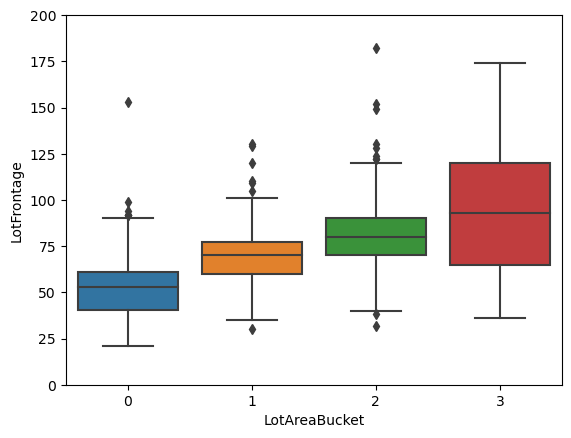

In [15]:
## We can see how LotFrontage increases with LotArea (last bucket has higher variance so our imputation may not be as good, but there are also fewer data points in that bucket)
sns.boxplot(data=df,x='LotAreaBucket',y='LotFrontage')
plt.ylim(0,200)

In [16]:
## We can replace missing values with the median within each bucket

df['LotFrontage'] = df.groupby('LotAreaBucket')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [17]:
# For GarageYrBlt, we would like to use age of garage as a variable - we can impute missing values with the age of the house
df.GarageYrBlt.fillna(df.YearBuilt,inplace=True)

In [18]:
## Masonry related variables : MasVnrType has None as an option, so the n/a values are unavailable data
## Since there are very few missing values, we can impute them with the median.mode
## Electrical as well can be imputed with the mode


df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)
df.MasVnrType.fillna(df.MasVnrType.mode(),inplace=True)
df.Electrical.fillna(df.Electrical.mode(),inplace=True)


In [19]:
dtypes = df.dtypes
numerical_cols = list(dtypes[(dtypes=='int64') | (dtypes=='float64')].keys())
categorical_cols = list(dtypes[dtypes=='object'].keys())
print(len(numerical_cols))
print(len(categorical_cols))

39
40


In [20]:
df[categorical_cols].nunique().sort_values()[:30]

Street           2
Utilities        2
CentralAir       2
LandSlope        3
PavedDrive       3
GarageFinish     4
LotShape         4
LandContour      4
ExterQual        4
MasVnrType       4
KitchenQual      4
BsmtExposure     5
BsmtCond         5
BsmtQual         5
ExterCond        5
MSZoning         5
HeatingQC        5
BldgType         5
Fence            5
LotConfig        5
Electrical       5
FireplaceQu      6
GarageQual       6
GarageCond       6
Heating          6
Foundation       6
RoofStyle        6
SaleCondition    6
BsmtFinType1     7
Functional       7
dtype: int64

# Univariate analysis

In [21]:
len(categorical_cols)

40

From the below charts we can see that >90% of values are the same in several columns - we can drop these as there is not enough variation for these to be useful predictors

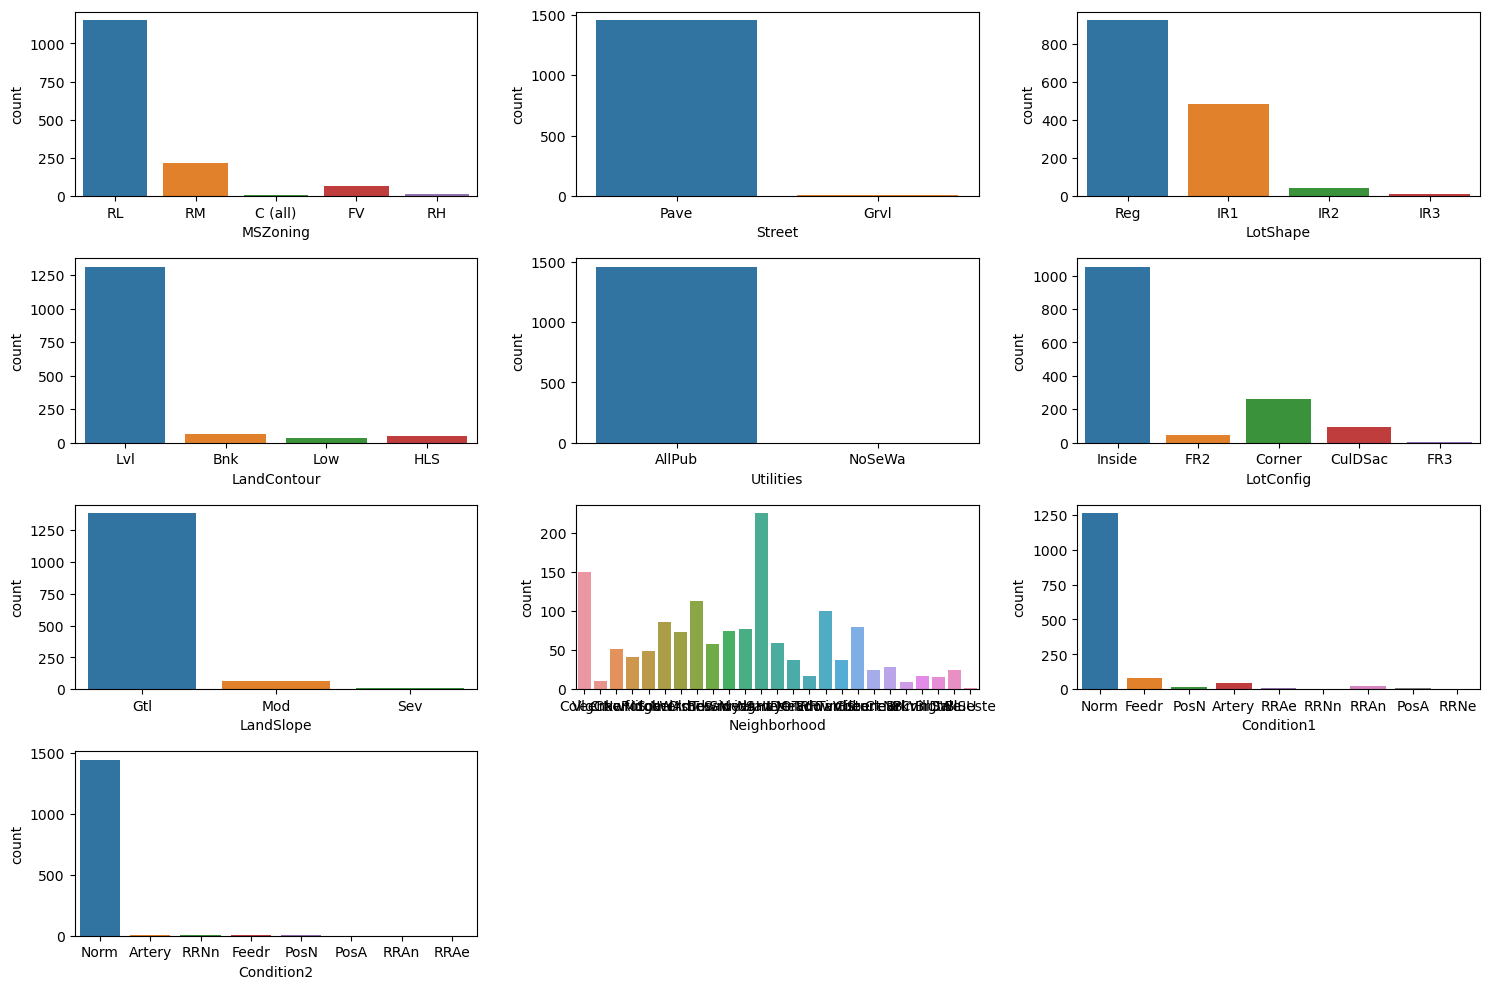

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[:10]):
    sns.countplot(x=col, data=df, ax=axs[i])

fig.delaxes(axs[-1]) 
fig.delaxes(axs[-2])
plt.tight_layout()
plt.show()

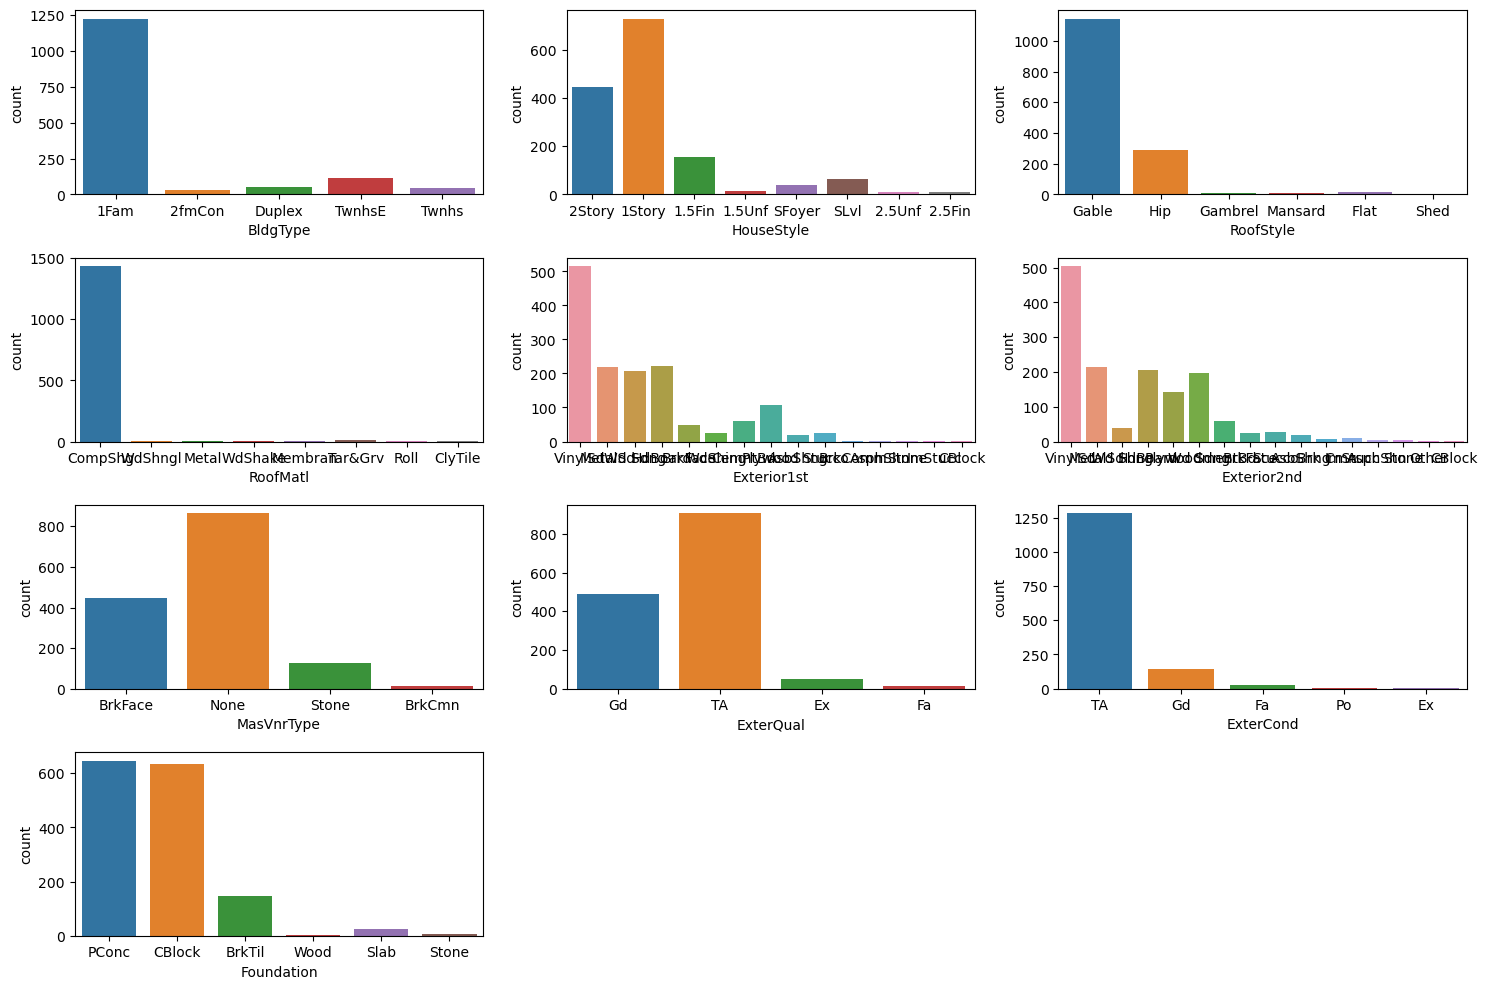

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[10:20]):
    sns.countplot(x=col, data=df, ax=axs[i])

fig.delaxes(axs[-1]) 
fig.delaxes(axs[-2])
plt.tight_layout()
plt.show()

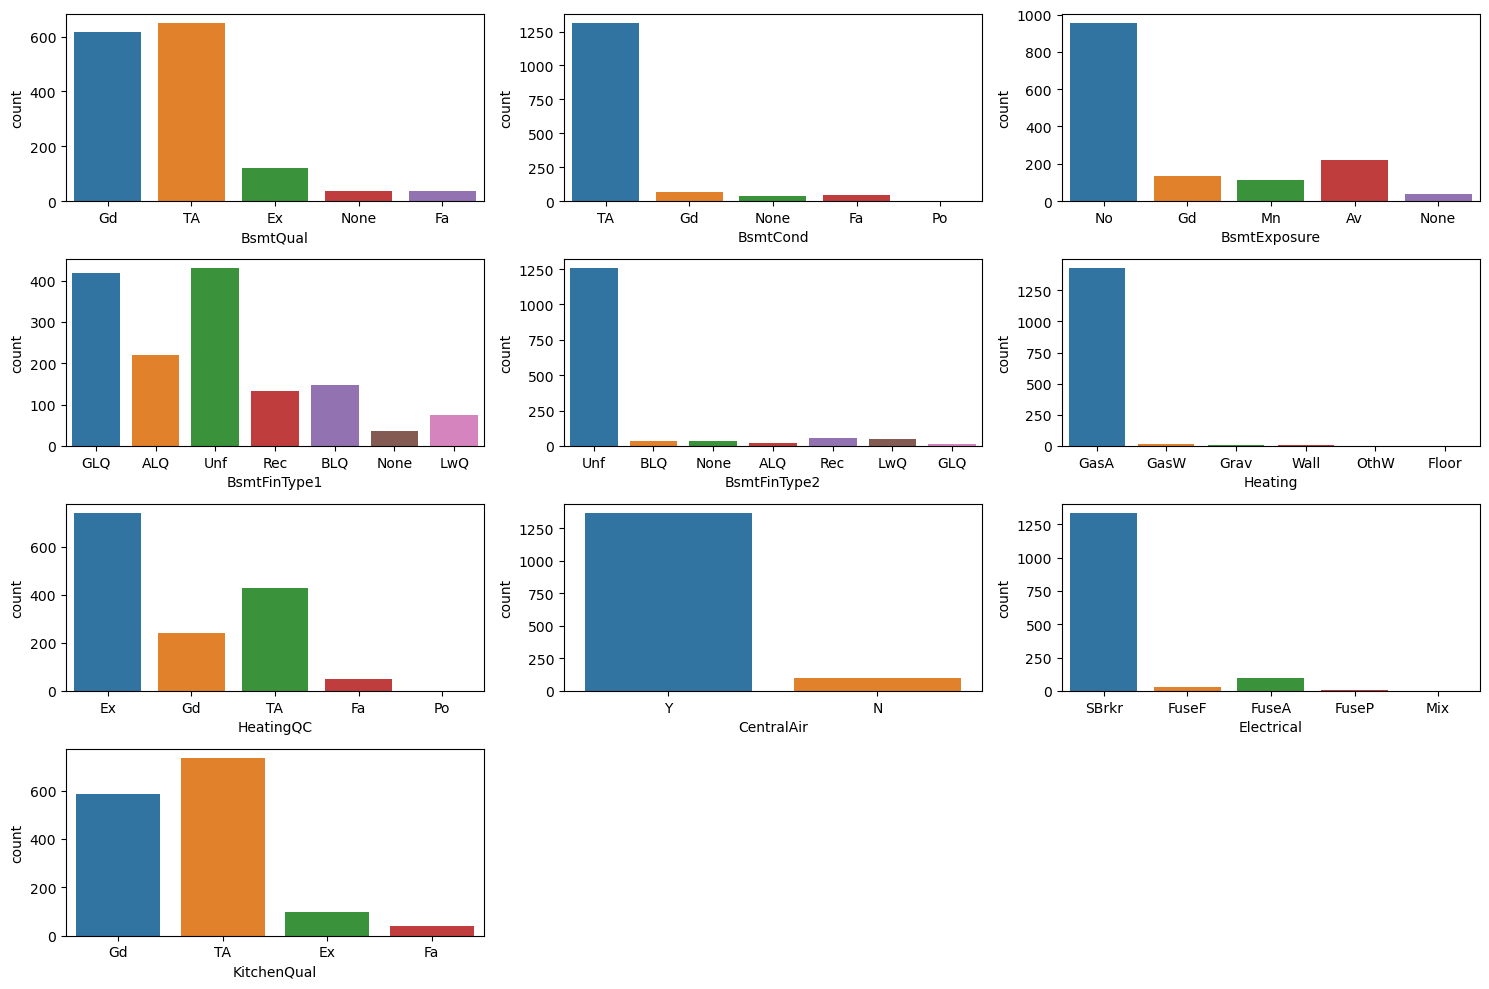

In [24]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[20:30]):
    sns.countplot(x=col, data=df, ax=axs[i])

fig.delaxes(axs[-1]) 
fig.delaxes(axs[-2])
plt.tight_layout()
plt.show()

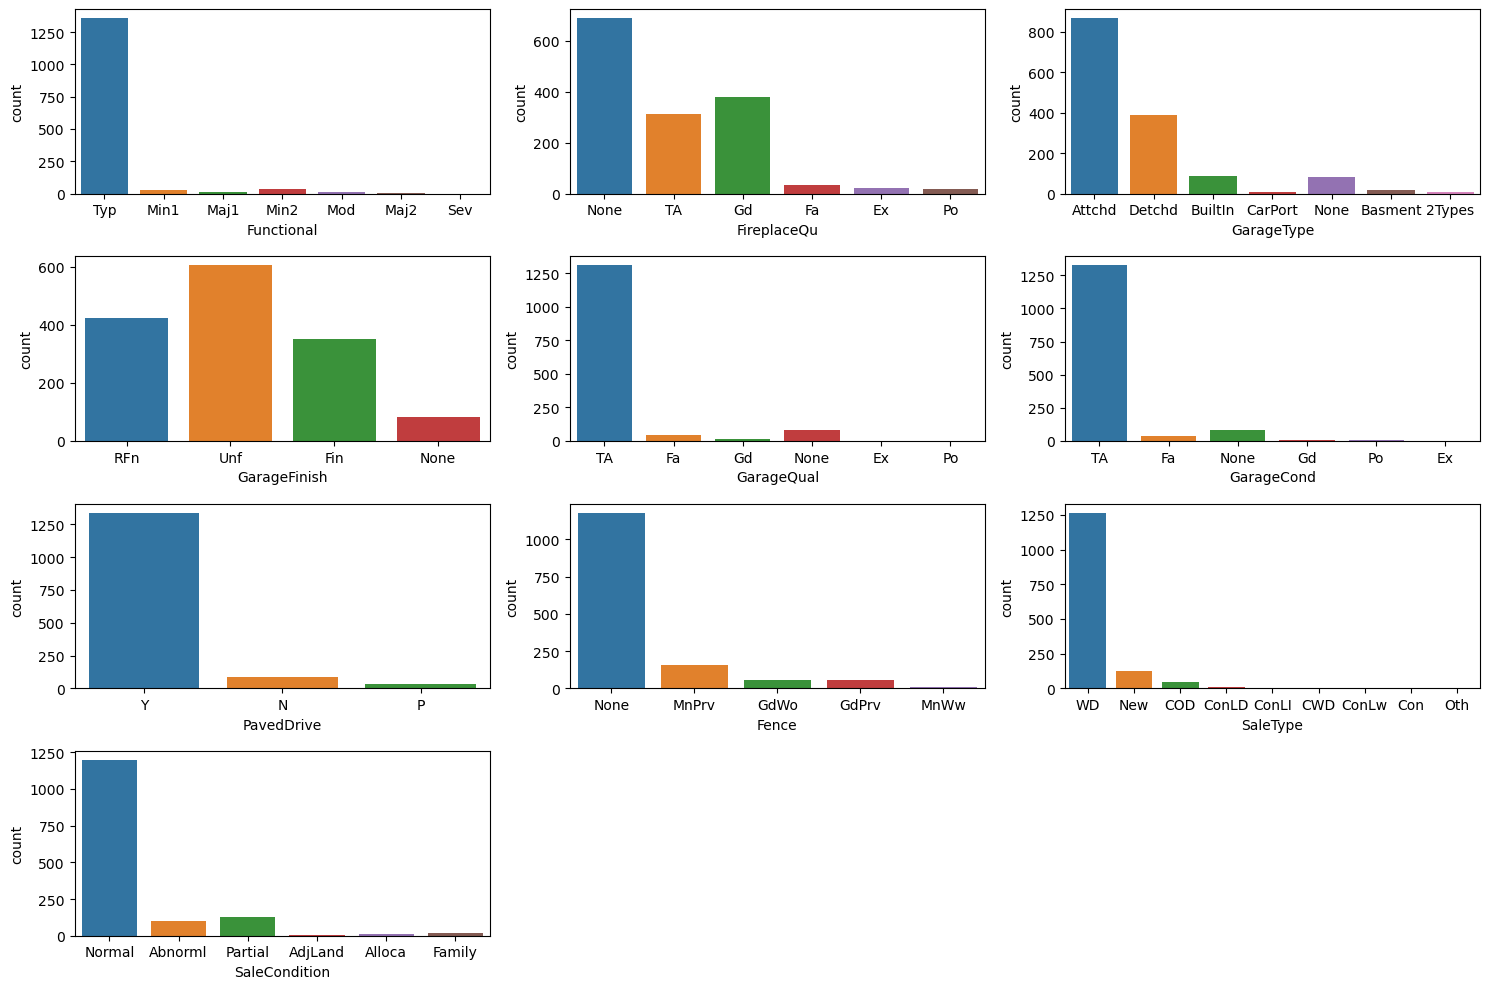

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[30:]):
    sns.countplot(x=col, data=df, ax=axs[i])

fig.delaxes(axs[-1]) 
fig.delaxes(axs[-2])
plt.tight_layout()
plt.show()

In [26]:
## Dropping columns where more than 90% of the data has the same value

drop_cats=[]
for i in categorical_cols:
    perc_mode = df[i].value_counts().max()/len(df)
    if perc_mode>.9:
        drop_cats.append(i)
    

In [27]:
drop_cats

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive']

In [28]:
categorical_cols = [x for x in categorical_cols if x not in drop_cats]

In [29]:
## Dropping
df.drop(drop_cats,axis=1,inplace=True)
df.shape

(1460, 68)

There are several nuances in the numerical columns
- Some features are continuous in nature (e.g. area/square ft. related variables
- Some are discrete ordered variables with very few unique values (e.g. FullBath, GarageCars)
- There are also year related features that need to be transformed
- Several columns seem to have outliers at the highest percentiles - these will have to be capped (in some cases columns have mostly zeros followed by outliers - these will be dropped)

In [30]:
df[numerical_cols].describe(percentiles=percentiles)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotAreaBucket
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.626712,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1.211644
std,421.610009,42.300571,22.782964,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.961779
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
1%,15.590000,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1910.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000,0.000000
5%,73.950000,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1924.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000,0.000000
10%,146.900000,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1939.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000,0.000000
20%,292.800000,20.000000,53.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.000000,1066.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1955.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000,0.000000
30%,438.700000,20.000000,60.000000,8063.700000,5.000000,5.000000,1958.000000,1971.000000,0.000000,0.000000,0.000000,280.000000,840.000000,915.700000,0.000000,0.000000,1208.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1963.000000,1.000000,384.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135500.000000,1.

In [31]:
## We can use the total Porch area and drop the subdivisions, as they are very sparsely populated
df['PorchArea'] = df[['3SsnPorch','ScreenPorch','OpenPorchSF','EnclosedPorch']].sum(axis=1)

## Also can take half/full basement baths as a one and drop them, as BsmtHalfBath is very sparsely populated
df['BasementBaths'] = df[['BsmtFullBath','BsmtHalfBath']].sum(axis=1)

In [32]:
## Dropping other very sparsely populated variables which cannot be transformed in a useful way, such as PoolArea and MiscVal
drop_numerical = ['LowQualFinSF','BsmtHalfBath','BsmtFullBath','3SsnPorch','ScreenPorch','OpenPorchSF','EnclosedPorch','PoolArea','MiscVal']

In [33]:
df.drop(drop_numerical,axis=1,inplace=True)
df.shape

(1460, 61)

In [34]:
dtypes = df.dtypes
numerical_cols_new = list(dtypes[(dtypes=='int64') | (dtypes=='float64')].keys())
categorical_cols_new = list(dtypes[dtypes=='object'].keys())
print(len(numerical_cols_new))
print(len(categorical_cols_new))

32
29


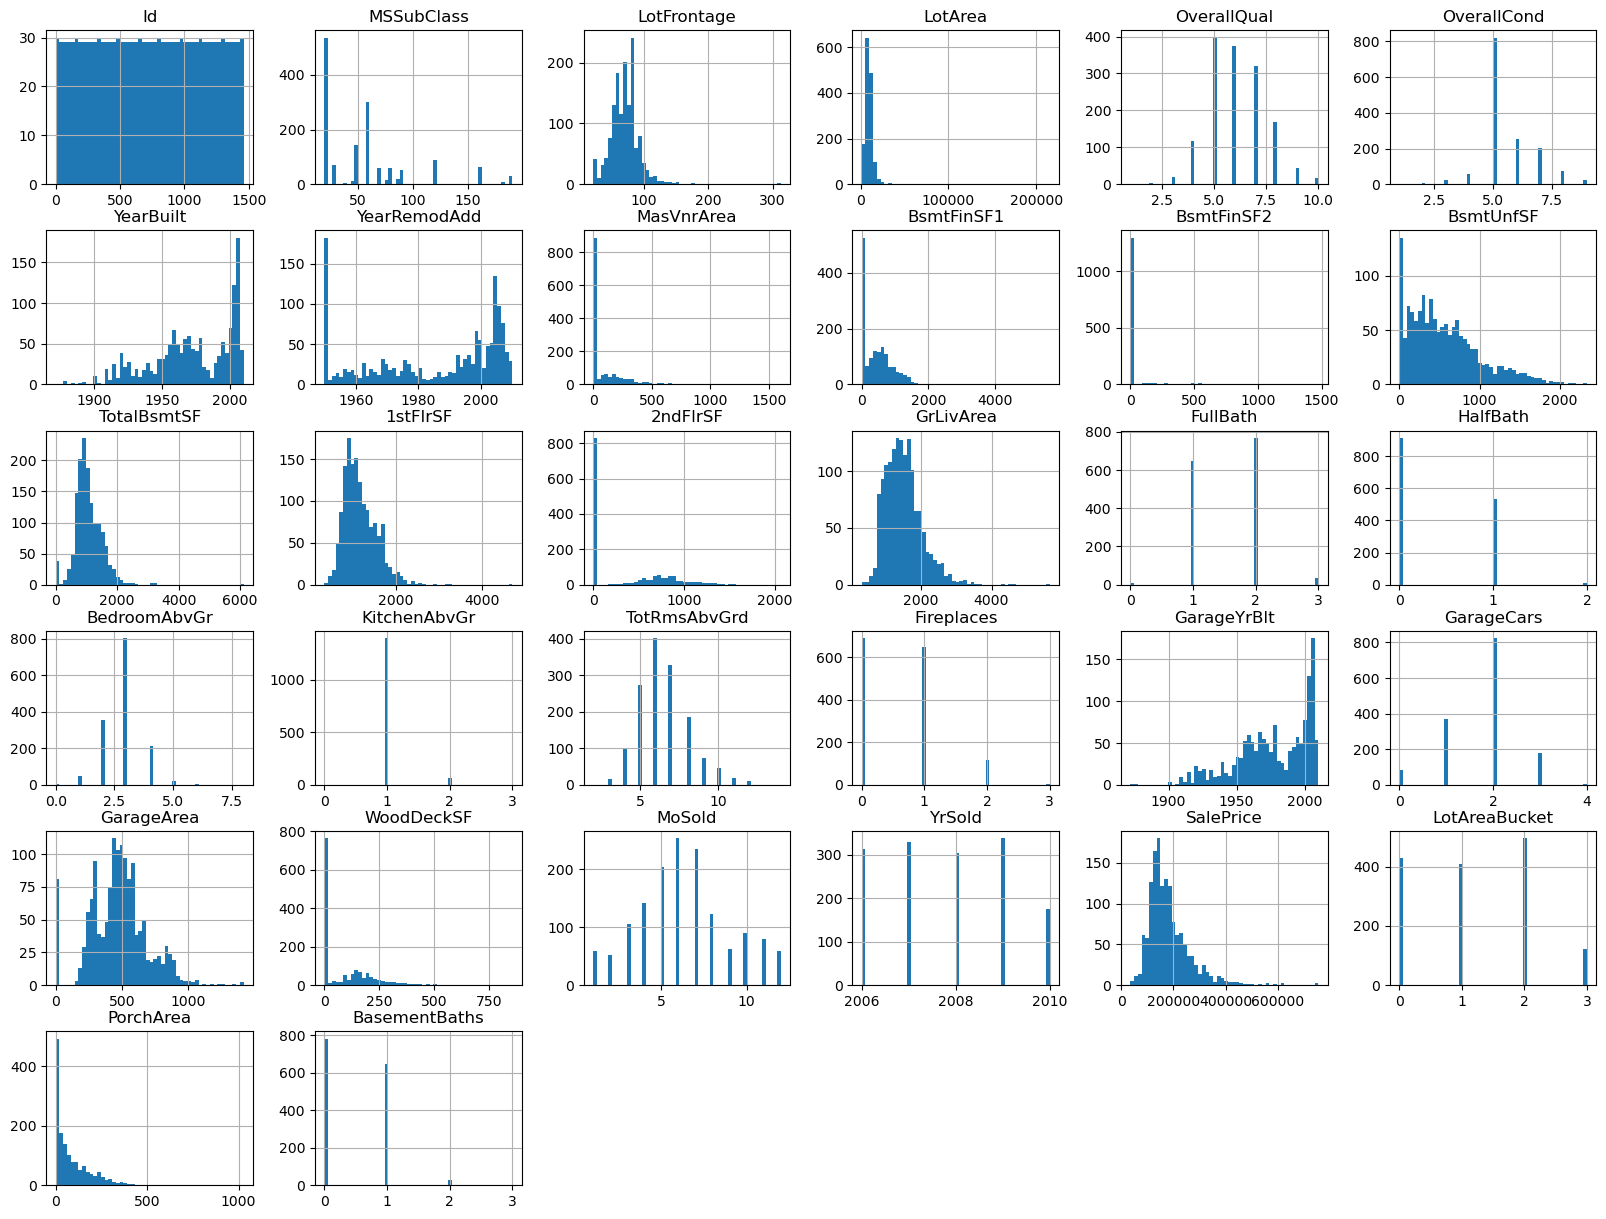

In [35]:
df[numerical_cols_new].hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
## We can derive variables from the Year related columns
df['HouseAge'] = df['YrSold']-df['YearBuilt']
df['RemodelAge'] = df['YrSold']-df['YearRemodAdd']
df['GarageAge'] = df['YrSold']-df['GarageYrBlt']


### Target variable (SalePrice) analysis

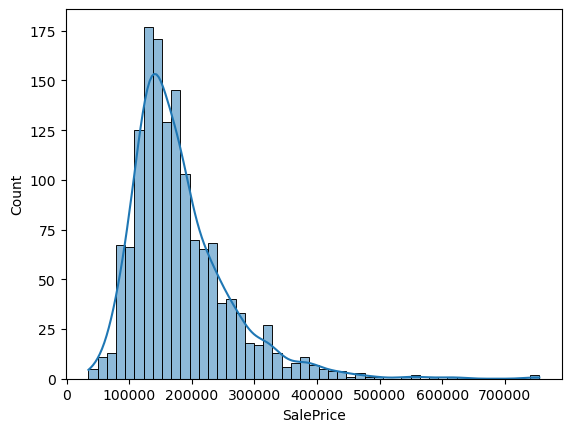

In [37]:
## Distribution is right skewed - log transformation may be appropriate
sns.histplot(df['SalePrice'],kde=True)
plt.show()

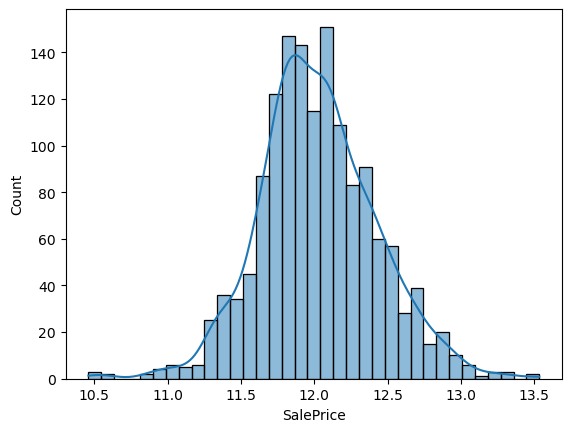

In [38]:
sns.histplot(np.log(df['SalePrice']),kde=True)
plt.show()

In [39]:
df['log_SalePrice']=np.log(df['SalePrice'])

## Outlier treatment

In [40]:
discrete_numerical = ['OverallQual','OverallCond', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageCars', 'BasementBaths','HouseAge','RemodelAge','GarageAge','BedroomAbvGr']

cont_numerical = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF','2ndFlrSF','GrLivArea', 'WoodDeckSF', 'PorchArea','GarageArea']

In [41]:
for i in cont_numerical:
    print(i)
    print('Ratio of max to 99th percentile is',df[i].max()/np.percentile(df[i],99))
    print('Ratio of 99th to 995th percentile is',np.percentile(df[i],99)/np.percentile(df[i],95))
    

LotFrontage
Ratio of max to 99th percentile is 2.277854595735389
Ratio of 99th to 995th percentile is 1.3212500000000007
LotArea
Ratio of max to 99th percentile is 5.729532118599912
Ratio of 99th to 995th percentile is 2.1589170830663615
MasVnrArea
Ratio of max to 99th percentile is 2.0220402386007463
Ratio of 99th to 995th percentile is 1.7352631578947382
BsmtFinSF1
Ratio of max to 99th percentile is 3.5893946235396617
Ratio of 99th to 995th percentile is 1.2342307692307692
BsmtFinSF2
Ratio of max to 99th percentile is 1.7750909222283742
Ratio of 99th to 995th percentile is 2.095860676426052
BsmtUnfSF
Ratio of max to 99th percentile is 1.2999081828552346
Ratio of 99th to 995th percentile is 1.224148501362398
TotalBsmtSF
Ratio of max to 99th percentile is 2.835201039419039
Ratio of 99th to 995th percentile is 1.2293496862521394
1stFlrSF
Ratio of max to 99th percentile is 2.11402773647644
Ratio of 99th to 995th percentile is 1.2119918088737205
2ndFlrSF
Ratio of max to 99th percentile is

In [42]:
## LotArea and BsmtFinSF1 seem to have some outliers above the 99th percentile (using a heuristic of max is >3x the 99th)

df.loc[df.LotArea>np.percentile(df.LotArea,99),'LotArea']=np.percentile(df.LotArea,99)
df.loc[df.BsmtFinSF1>np.percentile(df.BsmtFinSF1,99),'BsmtFinSF1']=np.percentile(df.BsmtFinSF1,99)


In [43]:
## No major outliers in the discrete numerical data

for i in discrete_numerical:
    print(i)
    print('Ratio of max to 99th percentile is',df[i].max()/np.percentile(df[i],99))
    print('Ratio of 99th to 995th percentile is',np.percentile(df[i],99)/np.percentile(df[i],95))
    

OverallQual
Ratio of max to 99th percentile is 1.0
Ratio of 99th to 995th percentile is 1.25
OverallCond
Ratio of max to 99th percentile is 1.0
Ratio of 99th to 995th percentile is 1.125
FullBath
Ratio of max to 99th percentile is 1.0
Ratio of 99th to 995th percentile is 1.5
HalfBath
Ratio of max to 99th percentile is 2.0
Ratio of 99th to 995th percentile is 1.0
KitchenAbvGr
Ratio of max to 99th percentile is 1.5
Ratio of 99th to 995th percentile is 2.0
TotRmsAbvGrd
Ratio of max to 99th percentile is 1.2727272727272727
Ratio of 99th to 995th percentile is 1.1
Fireplaces
Ratio of max to 99th percentile is 1.5
Ratio of 99th to 995th percentile is 1.0
GarageCars
Ratio of max to 99th percentile is 1.3333333333333333
Ratio of 99th to 995th percentile is 1.0
BasementBaths
Ratio of max to 99th percentile is 1.5
Ratio of 99th to 995th percentile is 2.0
HouseAge
Ratio of max to 99th percentile is 1.2317724843764142
Ratio of 99th to 995th percentile is 1.2132967032967041
RemodelAge
Ratio of max 

# Bivariate analysis

### Correlation plot

In [44]:
corr_df = df[cont_numerical+discrete_numerical].corr()

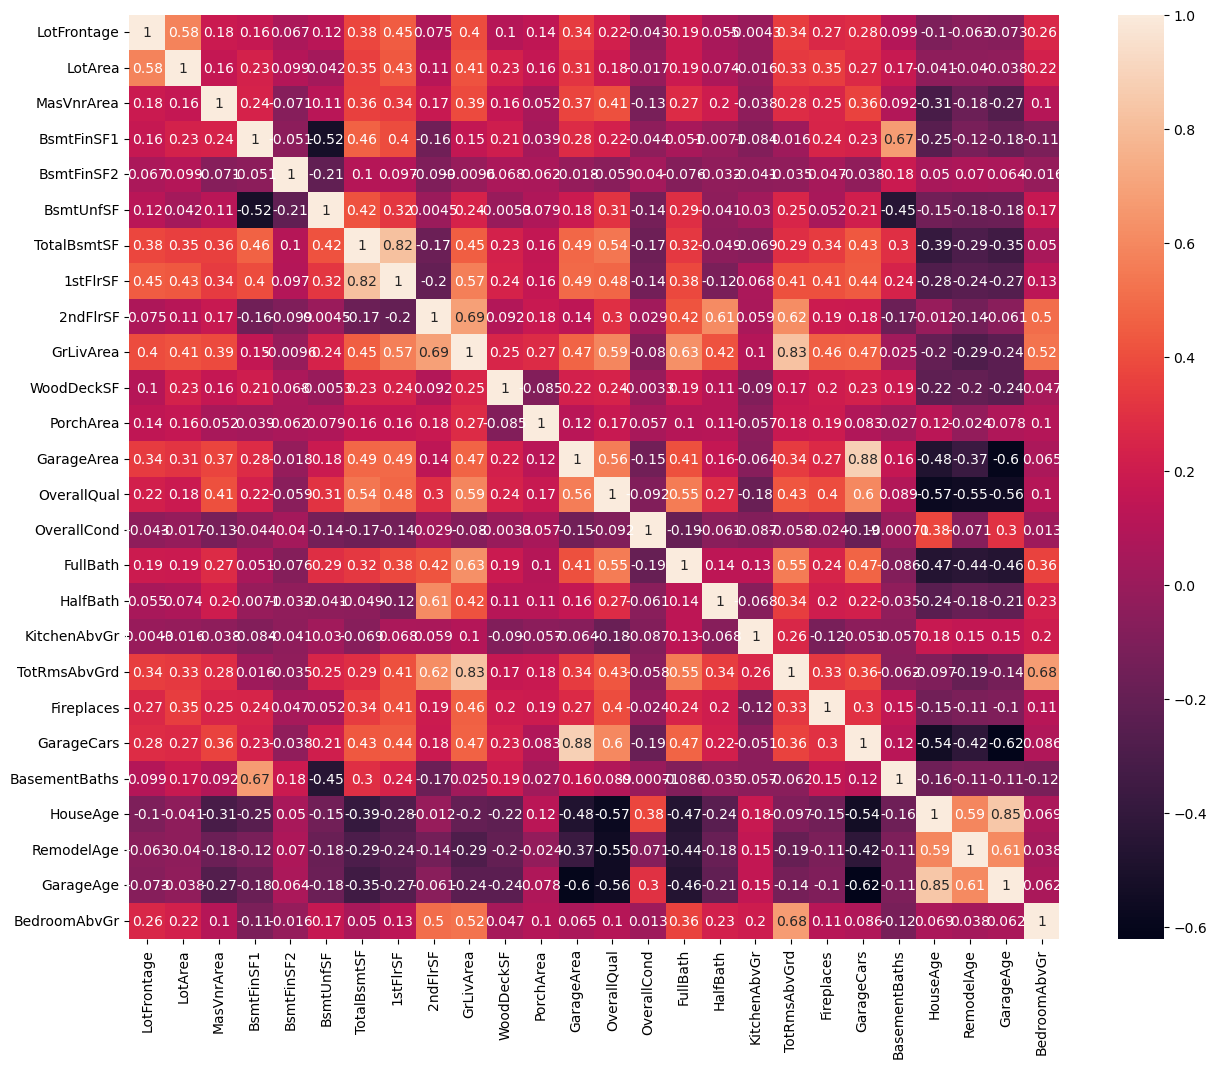

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_df,annot=True)
plt.show()

 There are some variables with very high correlation (>.8)

- TotRmsAbvGrd with GrLivArea
- FirstFlrSF with TotalBsmtSF
- GarageArea and GarageCars
- GarageAge and HouseAge

Will drop some variables based on these correlations

In [46]:
df.drop(['GarageAge','GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

In [47]:
cont_numerical = [x for x in cont_numerical if x not in ['GarageAge','GarageCars','TotRmsAbvGrd','TotalBsmtSF']]

In [48]:
discrete_numerical = [x for x in discrete_numerical if x not in ['GarageAge','GarageCars','TotRmsAbvGrd','TotalBsmtSF']]

In [49]:
print(len(cont_numerical))
print(len(discrete_numerical))

12
10


### Continuous variables

- GarageArea, GrLivArea, 1stFlrSF seem to have strong linear correlation with log of sales price
- Several other numerical columns, especially area/sq. ft. related also have weaker correlations

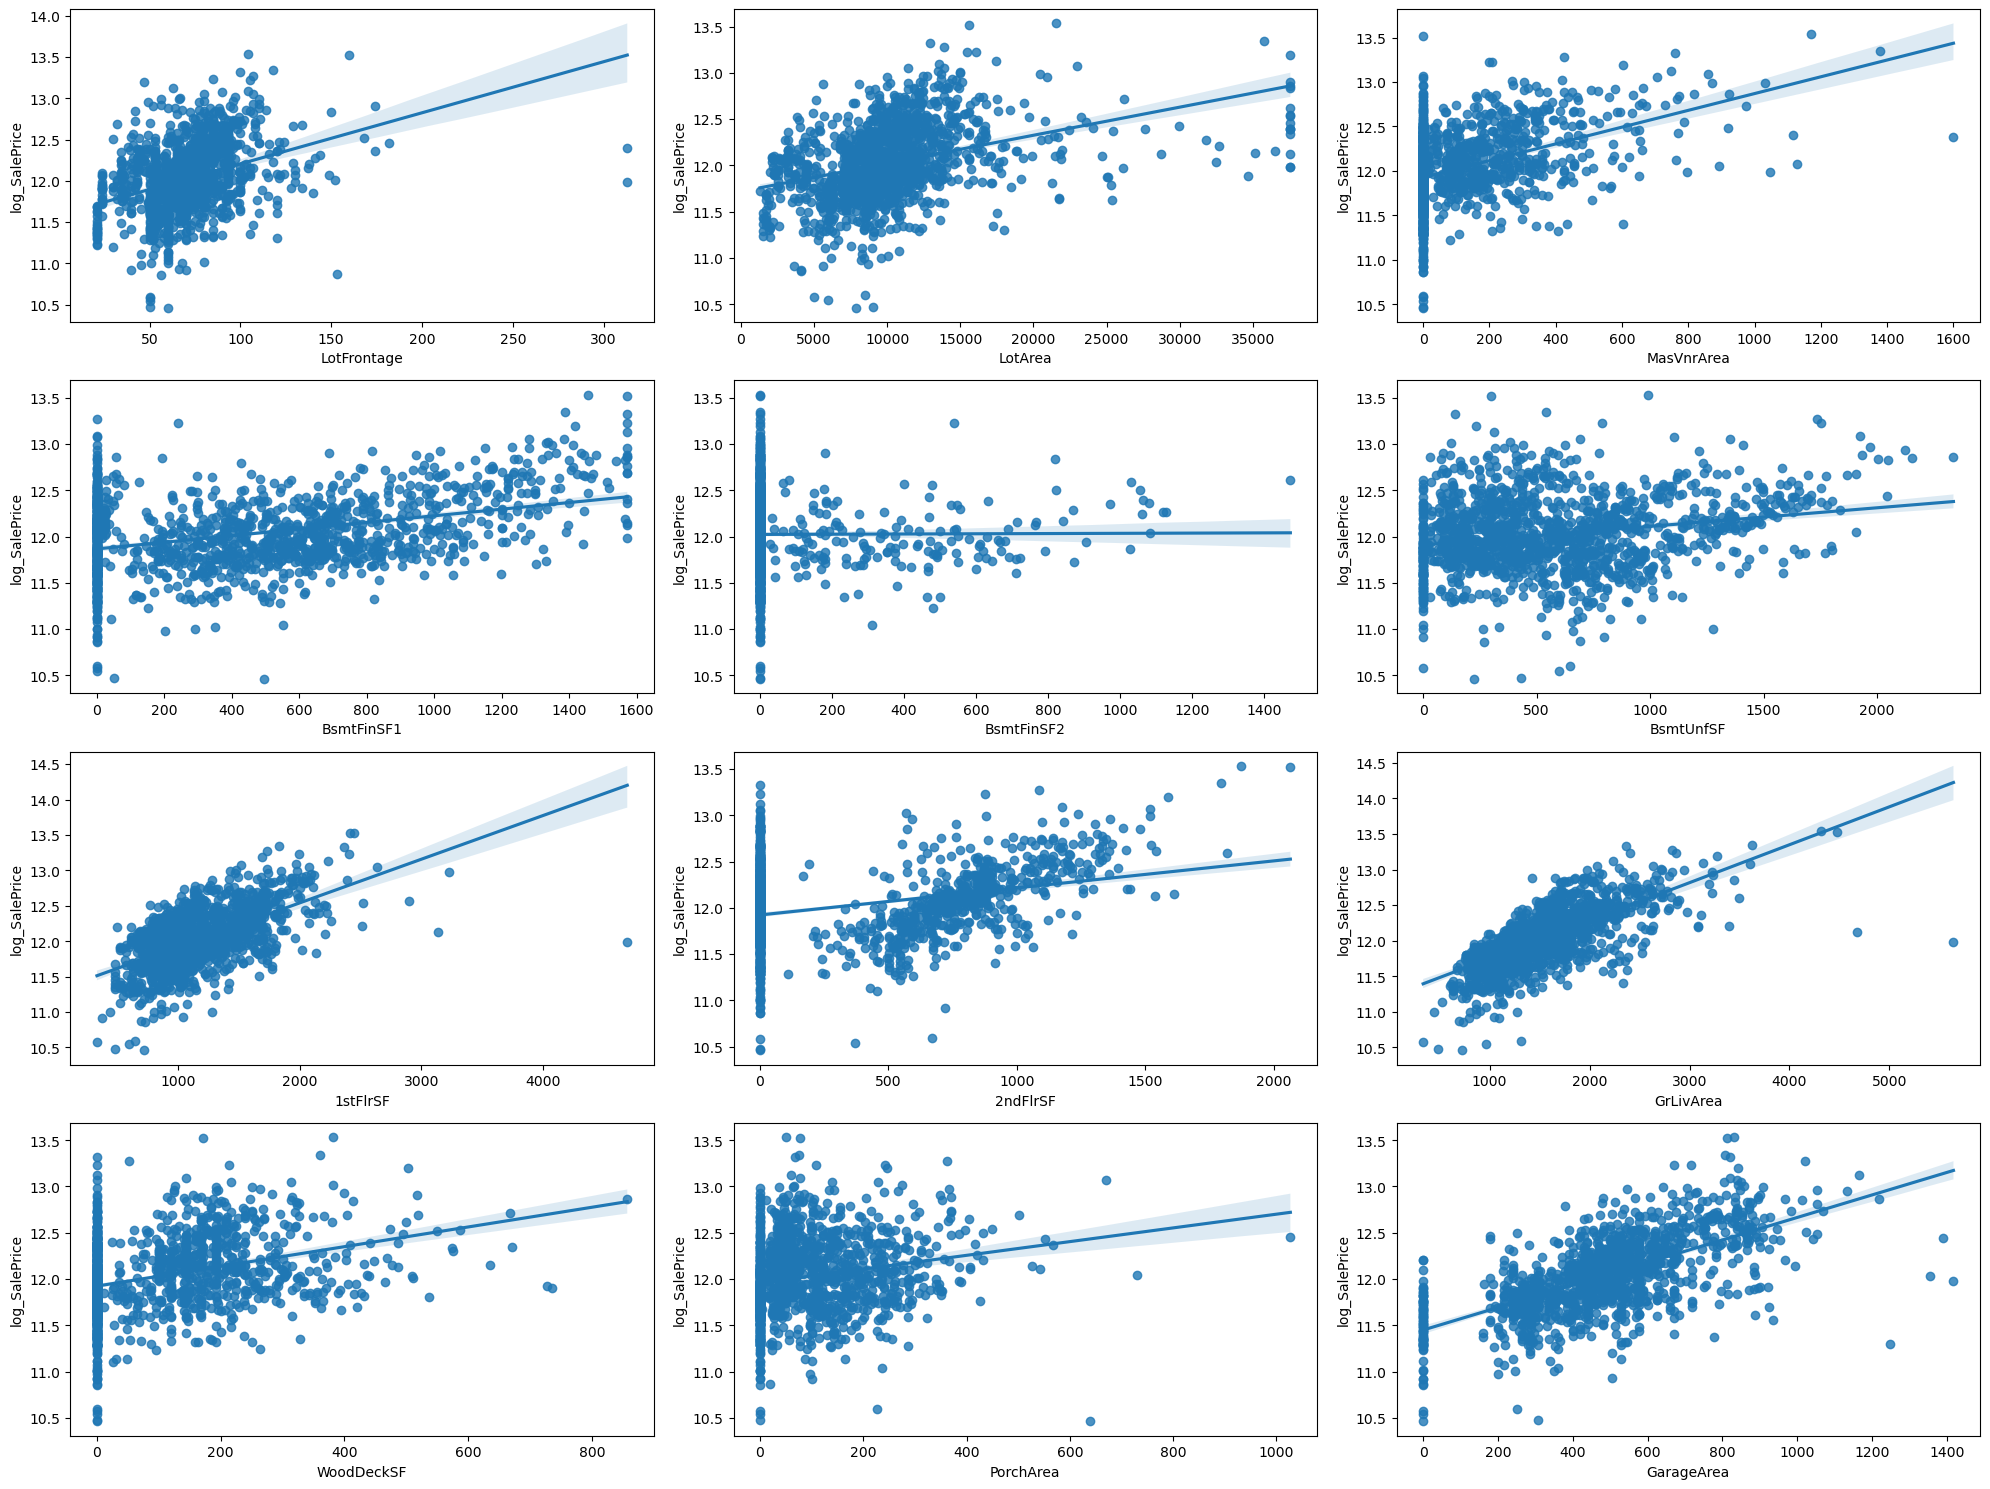

In [50]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  

axs = axs.flatten()

for i, col in enumerate(cont_numerical):
    sns.regplot(x=col, y='log_SalePrice', data=df, ax=axs[i])


plt.tight_layout()
plt.show()

### Discrete variables

In [51]:
## Based on the data dictionary, several categorical variables are also ordinal in nature, and can be converted into numerical data
poor_to_excellent={'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
poor_to_excellent_w_na={'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}


df['LotShape'] = df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
df['ExterQual'] = df['ExterQual'].map(poor_to_excellent)
df['ExterCond'] = df['ExterCond'].map(poor_to_excellent)
df['BsmtQual'] = df['BsmtQual'].map(poor_to_excellent_w_na)
df['BsmtCond'] = df['BsmtCond'].map(poor_to_excellent_w_na)
df['HeatingQC'] = df['HeatingQC'].map(poor_to_excellent)
df['KitchenQual'] = df['KitchenQual'].map(poor_to_excellent)
df['GarageQual'] = df['GarageQual'].map(poor_to_excellent_w_na)
df['FireplaceQu'] = df['FireplaceQu'].map(poor_to_excellent_w_na)


In [52]:
## Assigning columns to the appropraite lists

append_cols = ['LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','FireplaceQu']

for i in append_cols:
    discrete_numerical.append(i)
    
len(discrete_numerical)

19

In [61]:
categorical_cols = [x for x in categorical_cols if x not in append_cols]

- OverallQual & ExterQual seems to have a strong effect on log of sales price (other quality related variables also seem to have a positive effect)
- HouseAge seems to have a strong negative effect

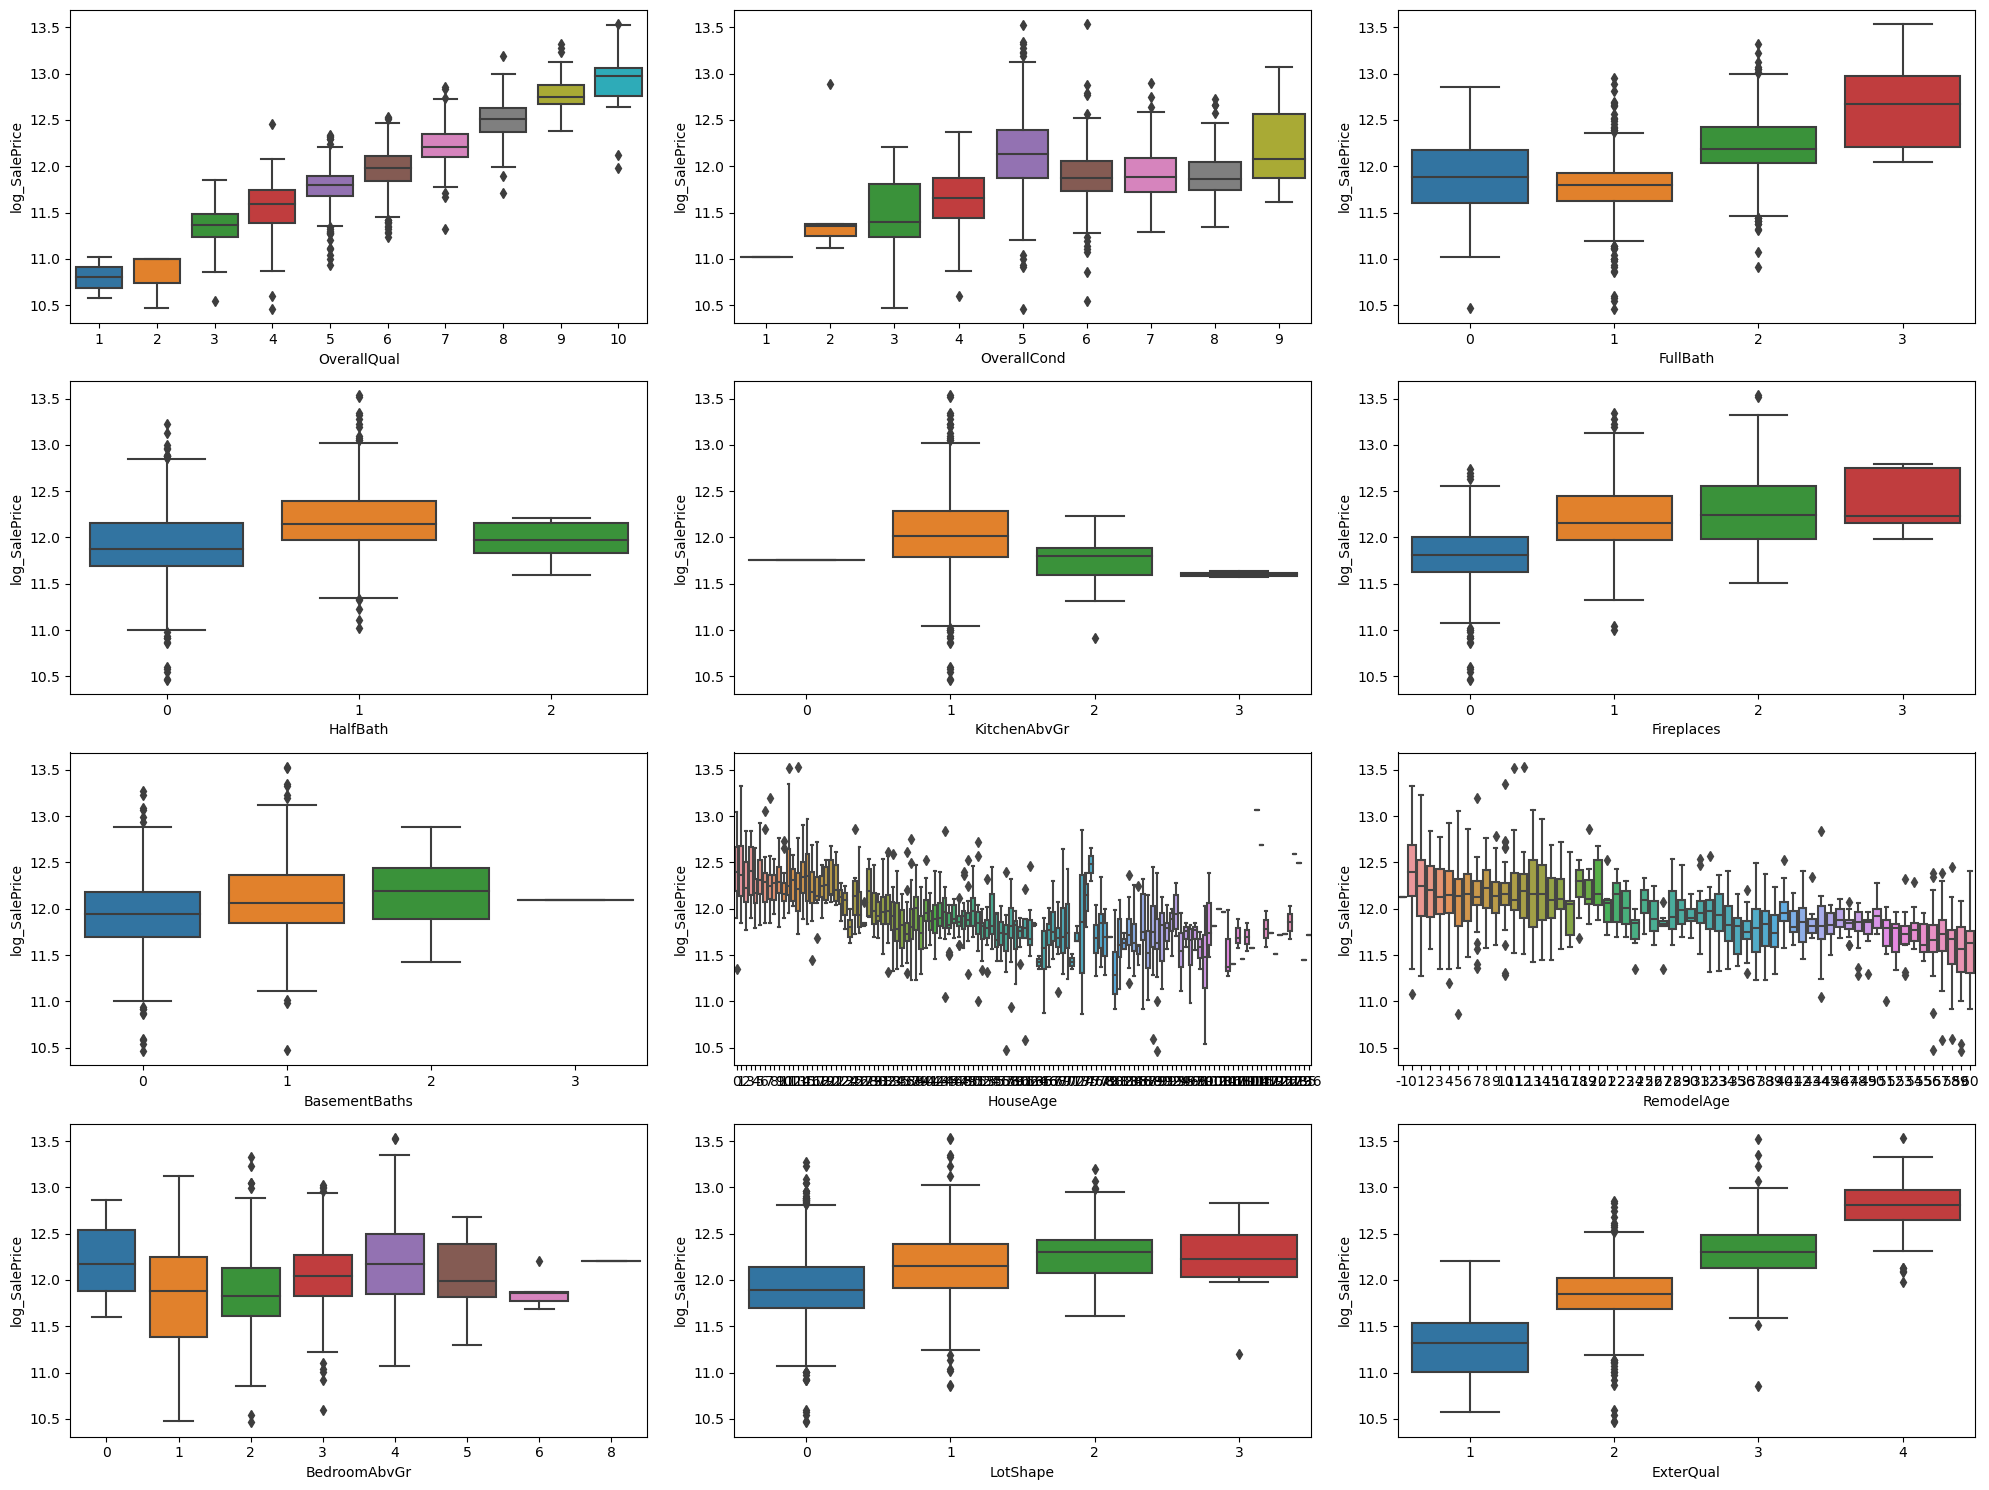

In [55]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  

axs = axs.flatten()

for i, col in enumerate(discrete_numerical[:12]):
    sns.boxplot(x=col, y='log_SalePrice', data=df, ax=axs[i])

plt.tight_layout()
plt.show()

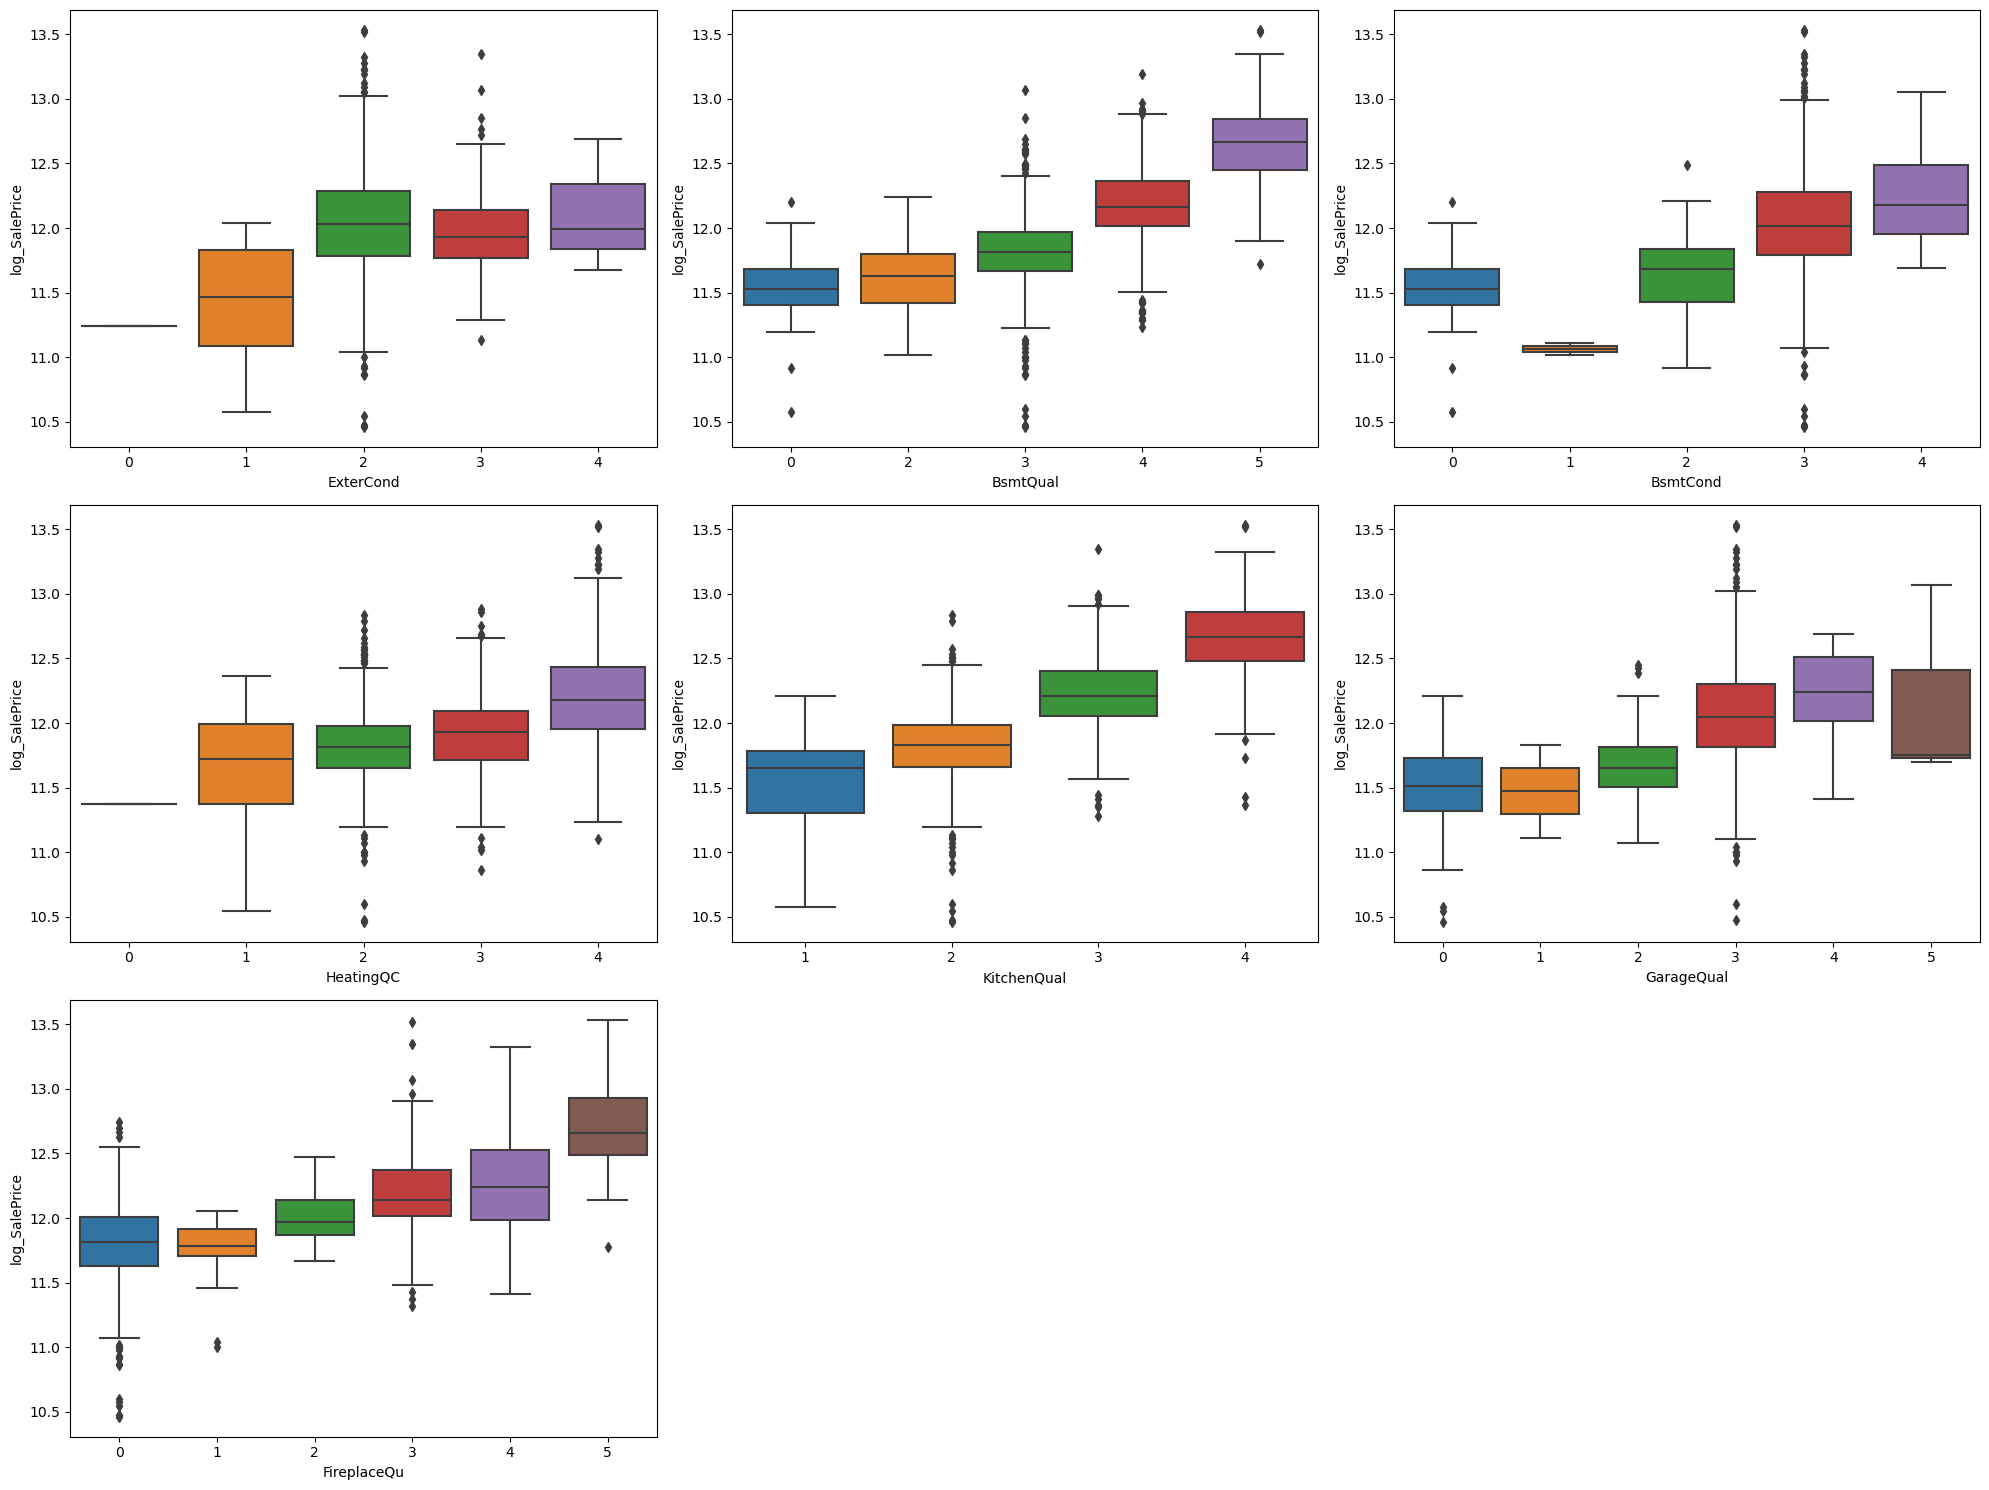

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  

axs = axs.flatten()

for i, col in enumerate(discrete_numerical[12:]):
    sns.boxplot(x=col, y='log_SalePrice', data=df, ax=axs[i])



fig.delaxes(axs[-1]) 
fig.delaxes(axs[-2]) 
plt.tight_layout()
plt.show()

### Categorical variables

In [64]:
categorical_cols.append('MSSubClass')

In [65]:
len(categorical_cols)

21

- Sale price seems to vary a lot with Neighborhood and MSZoning
- Most of the other categorical variables also seem to have some effect on sale price

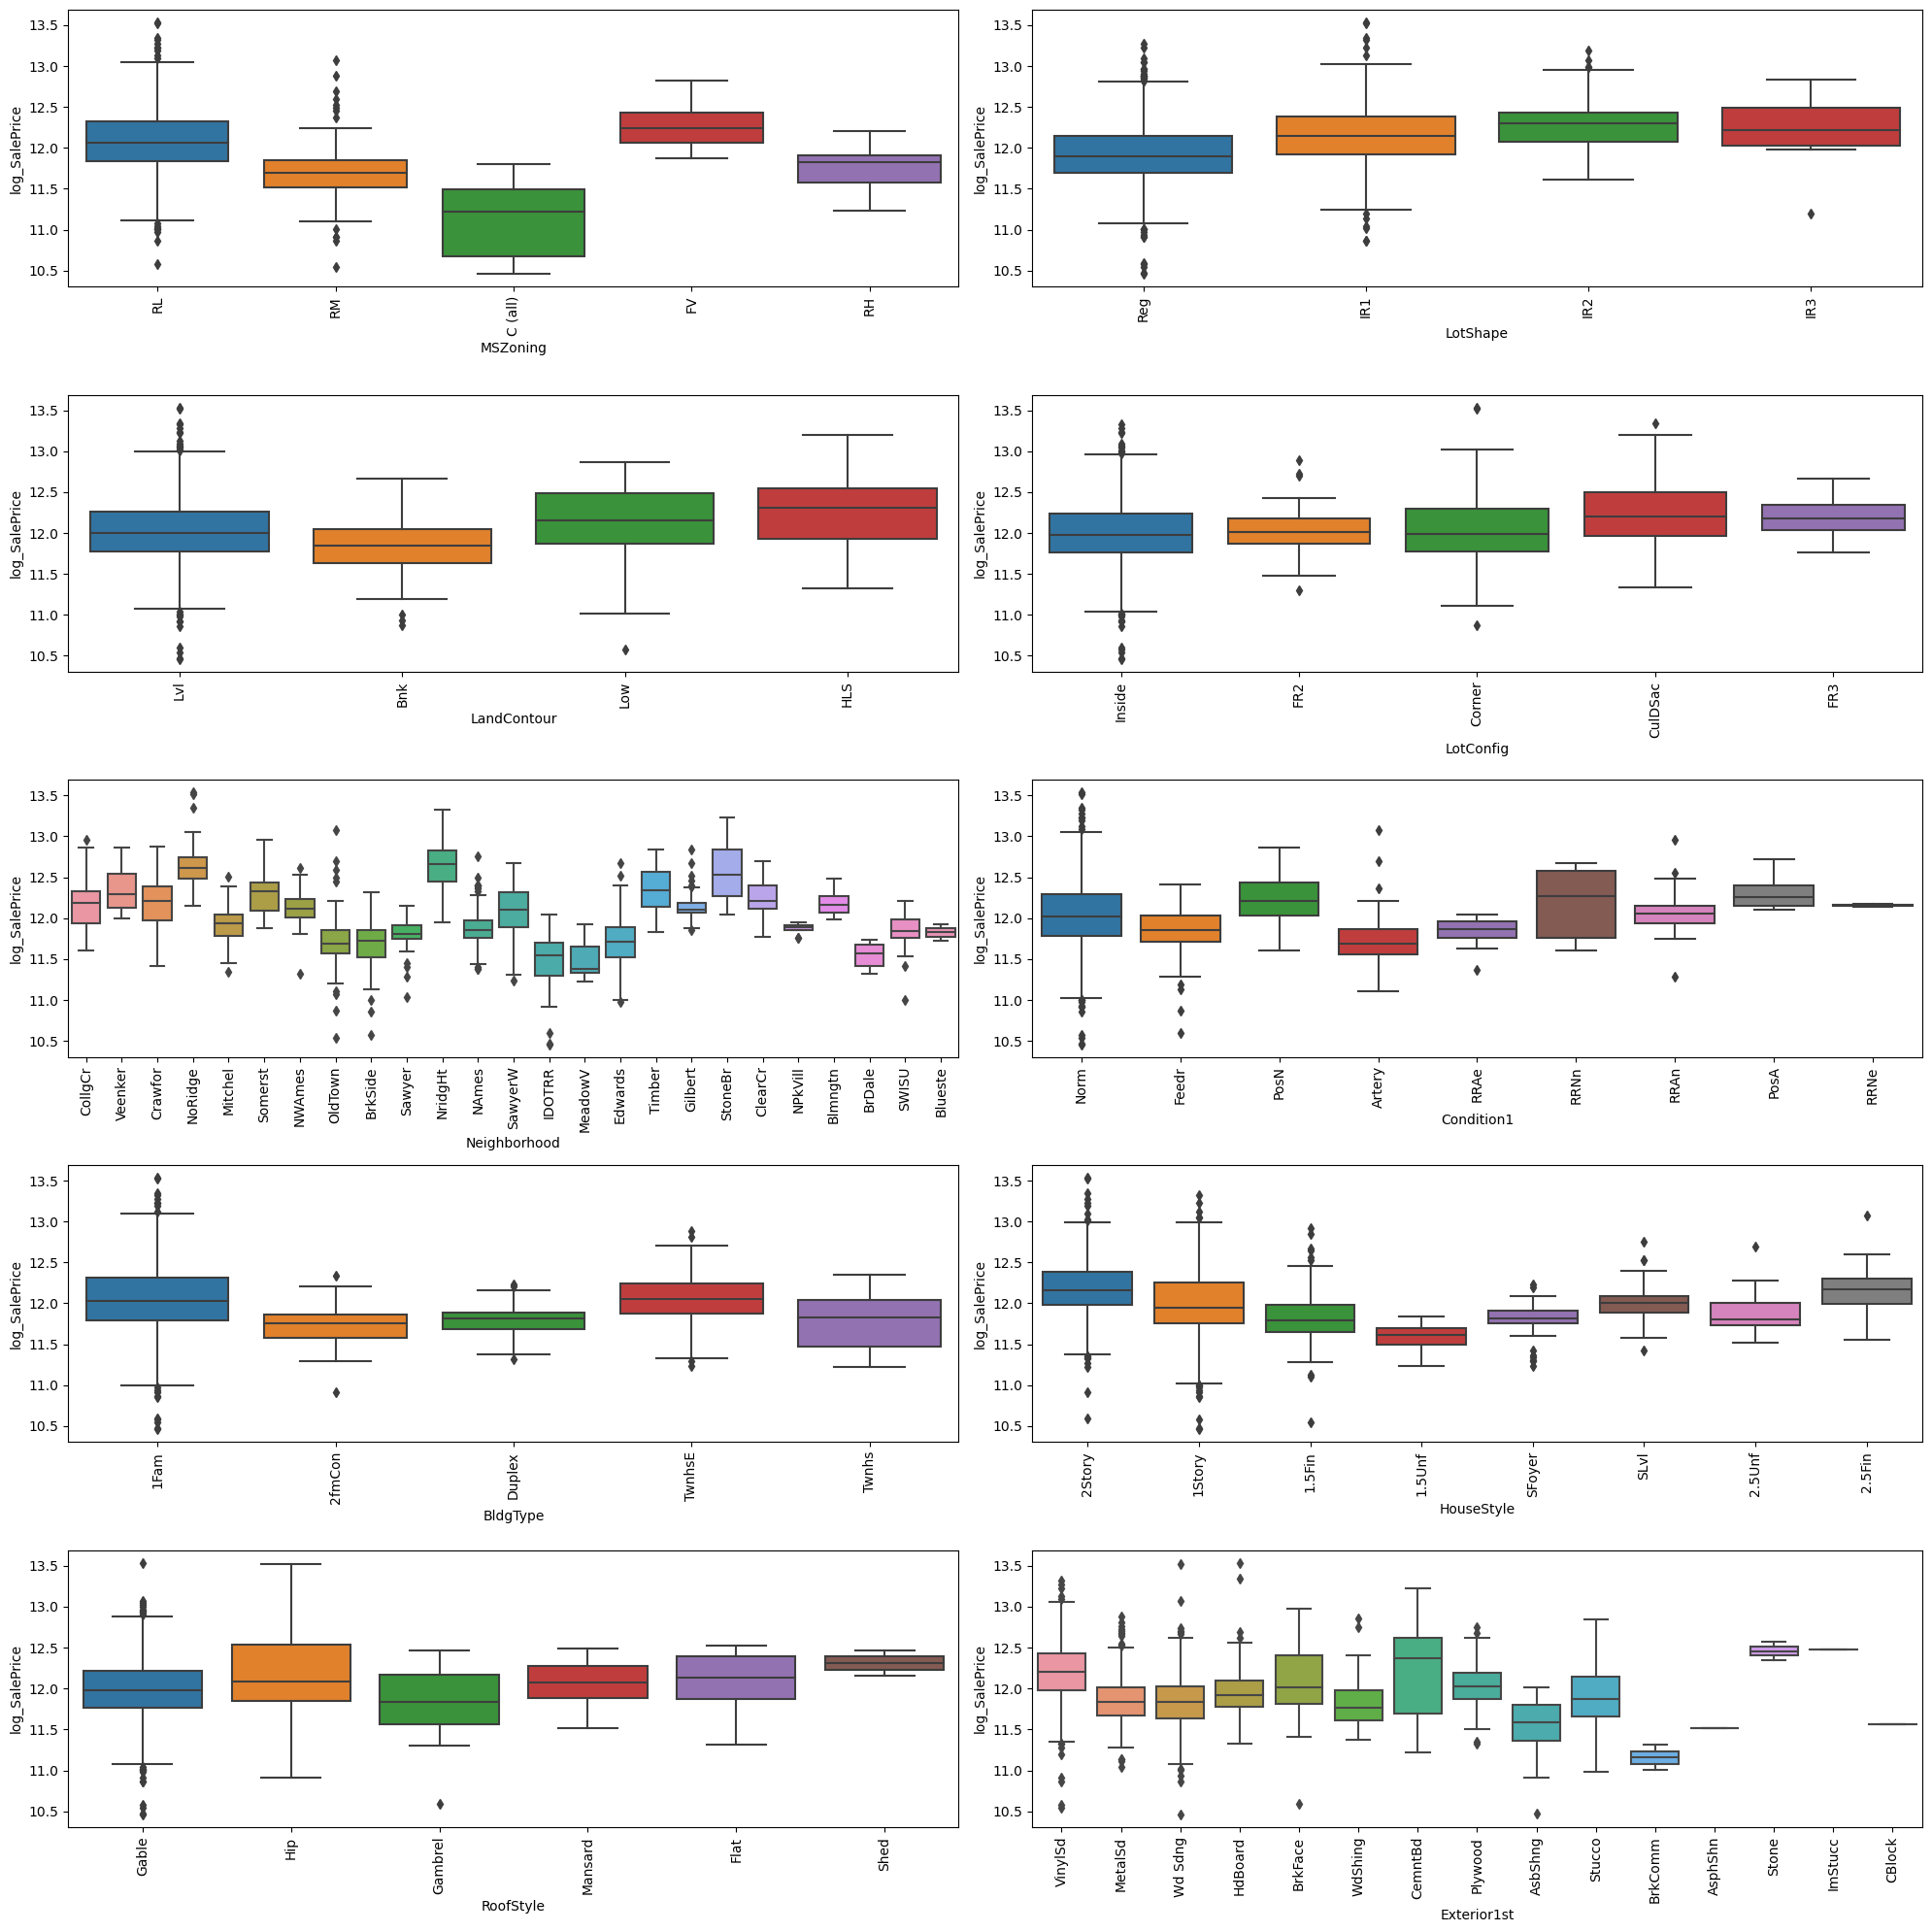

In [72]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[:10]):
    g = sns.boxplot(x=col, y='log_SalePrice',data=df, ax=axs[i])
    g.set_xticklabels(labels =g.get_xticklabels()  ,rotation=90)

plt.tight_layout()
plt.show()

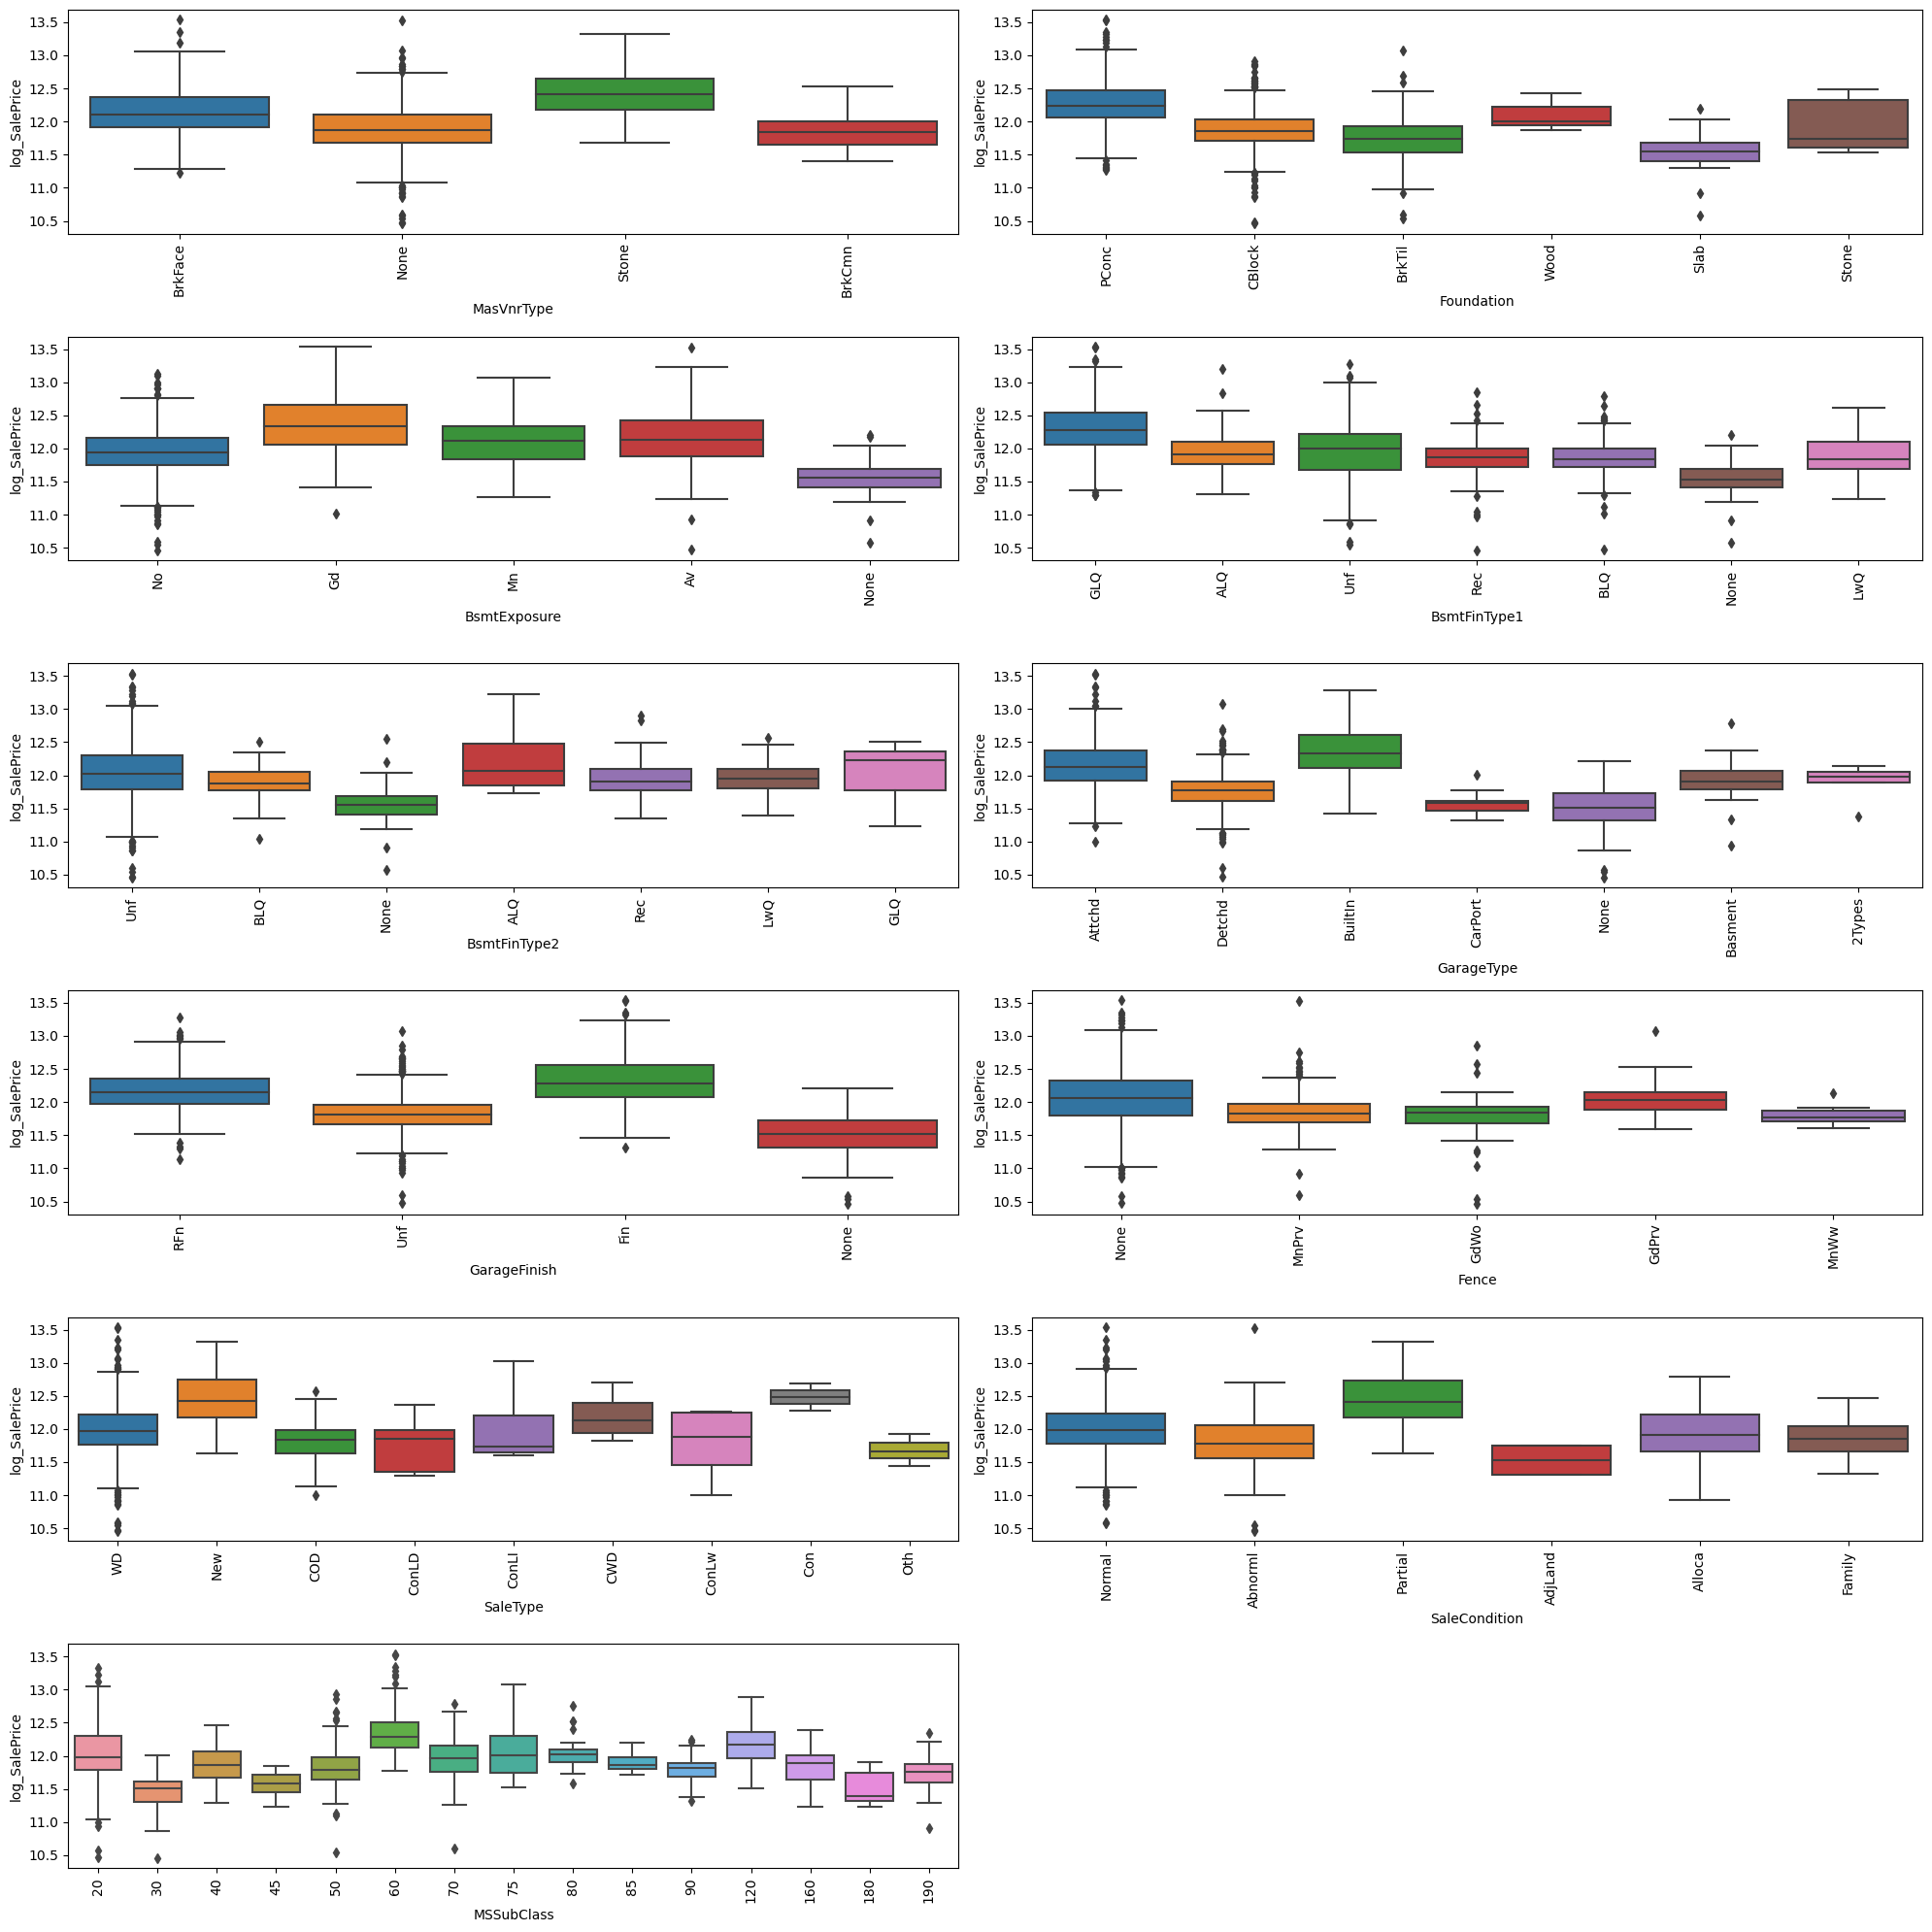

In [66]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 20)) 

axs = axs.flatten()

for i, col in enumerate(categorical_cols[10:]):
    g = sns.boxplot(x=col, y='log_SalePrice',data=df, ax=axs[i])
    g.set_xticklabels(labels =g.get_xticklabels()  ,rotation=90)

fig.delaxes(axs[-1]) 
plt.tight_layout()
plt.show()

# Model Building

In [68]:
## Converting categorical columns to dummies
dummy_df = pd.get_dummies(df[categorical_cols], drop_first=True)

In [74]:
X = pd.concat([df[cont_numerical],df[discrete_numerical],dummy_df],axis=1)
y = df['log_SalePrice']

In [77]:
## Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [78]:
X_train.shape

(1022, 170)

In [94]:
## Scaling X variables to get interpretable coefficients

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [99]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [100]:
X_train_scaled.columns=X_train.columns

We Will first use RFE to narrow the list of variables down to 100

In [102]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=100)


In [103]:
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [104]:
top_features = X_train_scaled.columns[rfe.support_]

In [106]:
X_train_rfe = X_train_scaled[top_features].copy()

X_train_rfe.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,PorchArea,GarageArea,OverallQual,OverallCond,FullBath,HalfBath,KitchenAbvGr,BasementBaths,HouseAge,RemodelAge,BedroomAbvGr,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,FireplaceQu,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,HouseStyle_2Story,HouseStyle_SLvl,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtExposure_Gd,BsmtFinType1_None,BsmtFinType2_BLQ,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_None,GarageFinish_None,Fence_GdWo,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.157534,0.114351,0.00,0.297632,0.0,0.169521,0.113889,0.000000,0.081860,0.000000,0.131507,0.000000,0.444444,0.625,0.333333,0.0,0.0,0.333333,0.610294,0.967213,0.250,0.333333,0.6,0.75,0.50,0.333333,0.0,0.0,0.058824,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.236301,0.233385,0.16,0.627699,0.0,0.154110,0.231481,0.616949,0.424289,0.396733,0.279452,0.462623,0.666667,0.500,0.666667,0.5,0.0,0.333333,0.117647,0.278689,0.500,0.666667,0.8,0.75,1.00,0.666667,0.6,0.6,0.235294,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.106164,0.201271,0.00,0.059781,0.0,0.274401,0.098611,0.333656,0.201576,0.000000,0.191781,0.155148,0.555556,0.375,0.333333,0.5,0.0,0.000000,0.477941,1.000000,0.375,0.333333,0.6,0.50,0.50,0.333333,0.6,0.8,0.176471,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.130137,0.106205,0.00,0.000000,0.0,0.207620,0.145602,0.307022,0.230015,0.459743,0.000000,0.179831,0.555556,0.875,0.333333,0.0,0.0,0.000000,0.705882,0.065574,0.250,0.333333,0.6,0.50,0.75,0.666667,0.4,0.0,0.176471,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.133562,0.273284,0.00,0.000000,0.0,0.332620,0.202315,0.505569,0.355880,0.000000,0.156164,0.394922,0.333333,0.625,0.666667,0.0,0.5,0.000000,0.919118,1.000000,0.500,0.333333,0.6,0.75,0.75,0.333333,0.6,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

This still seems like too many variables as we are seeing several variables with very high VIFs
One way we can get a rough idea of how many variables to select -
1. Run RFE for top 10/20/30/40.. features
2. Check at what value R-squared seem to taper off
3. Use that many features for next steps

In [109]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["vif"] = [variance_inflation_factor(X_train_rfe, i) for i in range(len(X_train_rfe.columns))]

vif_data

/Users/kaustub/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/kaustub/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,LotFrontage,14.387002
1,LotArea,11.364415
2,MasVnrArea,2.945569
3,BsmtFinSF1,21.361264
4,BsmtFinSF2,2.774362
...,...,...
95,SaleCondition_AdjLand,1.200540
96,SaleCondition_Alloca,1.418790
97,SaleCondition_Family,1.315461
98,SaleCondition_Normal,15.559527


In [112]:
## Too many high VIF variables - can reduce considerably
vif_data.sort_values(by='vif',ascending=False)[:30]

,feature,vif
99,SaleCondition_Partial,inf
71,Exterior2nd_CBlock,inf
61,Exterior1st_AsphShn,inf
64,Exterior1st_CBlock,inf
93,SaleType_New,inf
88,GarageFinish_None,inf
87,GarageType_None,inf
69,Exterior2nd_AsphShn,inf
8,GrLivArea,782.366572
6,1stFlrSF,453.234324


In [114]:
feature_sets=[]
r2_scores=[]
for i in [10,20,30,40,50,60,70]:
    lm = LinearRegression()
    rfe = RFE(estimator=lm, n_features_to_select=i)
    rfe.fit(X_train_rfe,y_train)
    features  = X_train_rfe.columns[rfe.support_]
    feature_sets.append(features)
    X_new = X_train_rfe[features]
    reg_model = lm.fit(X_new,y_train)
    y_pred = reg_model.predict(X_new)
    r2 = r2_score(y_train,y_pred)
    print(r2)
    r2_scores.append(r2)

0.8510896709993567
0.8776795410177107
0.897704501540064
0.9044445253027198
0.9102285683333212
0.914467290583499
0.9177951555684257


In [127]:
## Based on this, we can see there is not much icnrease in r-squared value once we cross 40 variables

features_rfe2 = feature_sets[3]

X_train_rfe2=X_train_rfe[features_rfe2].copy()

In [120]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe2.columns
vif_data["vif"] = [variance_inflation_factor(X_train_rfe2, i) for i in range(len(X_train_rfe2.columns))]

vif_data

,feature,vif
0,LotFrontage,11.665966
1,LotArea,8.380139
2,BsmtFinSF1,15.833949
3,BsmtFinSF2,2.212269
4,BsmtUnfSF,20.482947
5,1stFlrSF,406.860009
6,2ndFlrSF,151.919301
7,GrLivArea,698.041762
8,GarageArea,16.704386
9,OverallQual,52.993364


In [122]:
vif_data.sort_values(by='vif',ascending=False)[:20]

,feature,vif
7,GrLivArea,698.041762
5,1stFlrSF,406.860009
6,2ndFlrSF,151.919301
16,GarageQual,117.259184
20,MSZoning_RL,90.132245
15,BsmtQual,70.294656
9,OverallQual,52.993364
34,BsmtFinType1_None,38.222450
35,BsmtFinType2_None,33.566681
10,OverallCond,30.653302


In [128]:
## Dropping more variables based on VIF

X_train_rfe2.drop(['GrLivArea','1stFlrSF'],axis=1,inplace=True)

In [129]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe2.columns
vif_data["vif"] = [variance_inflation_factor(X_train_rfe2, i) for i in range(len(X_train_rfe2.columns))]

vif_data.sort_values(by='vif',ascending=False)[:20]

,feature,vif
14,GarageQual,116.521489
18,MSZoning_RL,87.245110
13,BsmtQual,69.742689
7,OverallQual,51.727982
32,BsmtFinType1_None,34.913439
33,BsmtFinType2_None,32.111431
8,OverallCond,30.464738
12,BedroomAbvGr,23.600936
19,MSZoning_RM,17.443627
6,GarageArea,16.354696


In [130]:
## Dropping several other variables with very high VIF

X_train_rfe2.drop(['GarageQual','MSZoning_RL','BsmtQual','OverallQual','BsmtFinType1_None'],axis=1,inplace=True)

In [131]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe2.columns
vif_data["vif"] = [variance_inflation_factor(X_train_rfe2, i) for i in range(len(X_train_rfe2.columns))]

vif_data.sort_values(by='vif',ascending=False)[:20]

,feature,vif
11,BedroomAbvGr,20.974949
7,OverallCond,16.972893
6,GarageArea,14.558163
0,LotFrontage,11.152361
4,BsmtUnfSF,8.381283
1,LotArea,8.256524
9,HouseAge,7.563109
2,BsmtFinSF1,6.683373
21,Neighborhood_Somerst,4.467505
13,MSZoning_FV,4.234403


In [134]:
X_train_rfe2.drop('BedroomAbvGr',axis=1,inplace=True)

In [135]:
X_train_rfe2.shape

(1022, 32)

In [138]:
# Transforming test dataset
X_test_scaled = scaler.transform(X_test)

In [141]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns=X_test.columns
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,PorchArea,GarageArea,OverallQual,OverallCond,FullBath,HalfBath,KitchenAbvGr,Fireplaces,BasementBaths,HouseAge,RemodelAge,BedroomAbvGr,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,FireplaceQu,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,60.0,9000.0,0.0,616.0,0,248,864,0,864,0,0,528,4,6,1,0,1,0,0,36,36,3,0,2,2,3,3,2,2,3,0,20,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,89.0,11645.0,0.0,0.0,0,860,860,860,1720,0,70,565,7,5,2,1,1,0,0,2,2,3,1,3,2,4,3,4,3,3,0,60,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
780,63.0,7875.0,38.0,0.0,0,1237,1253,0,1253,220,21,402,7,5,2,0,1,1,0,12,11,3,0,2,2,4,4,3,2,3,3,20,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
382,79.0,9245.0,0.0,0.0,0,939,939,858,1797,144,53,639,7,5,2,1,1,0,0,1,1,3,1,3,2,4,3,4,3,3,0,60,0

In [143]:
X_test_final = X_test_scaled[X_train_rfe2.columns].copy()


In [151]:
def model_build_eval(X_train,y_train,X_test,y_test,estimator,params):
    
    ## Grid search for best parameter
    model_cv = GridSearchCV(estimator = estimator, param_grid = params, scoring= 'r2', cv = 5, return_train_score=True, verbose = 1)            
    model_cv.fit(X_train,y_train)
    best_alpha = model_cv.best_params_["alpha"]
    print("Optimum Alpha Values : ",best_alpha)
    ## Fit the best model
    best_model = model_cv.best_estimator_
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    ## Effect size of coefficients
    feature_effect_size = pd.DataFrame()
    feature_effect_size['feature'] = X_train.columns
    feature_effect_size['coeff'] = best_model.coef_
    
    ## Train/Test performance
    train_r2 =r2_score(y_train,y_train_pred)
    test_r2 =r2_score(y_test,y_test_pred)
    print('Train R2 score : ',train_r2)
    print('Test R2 score : ',test_r2)
    
    return best_model,feature_effect_size
    
    
    
    

Doing hyperparameter tuning in 2 rounds - first to find the approximate best value, and then to fine tune it

## Ridge Regression

In [152]:
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 50, 100, 1000 ]}

In [153]:
ridge_estimator = Ridge(random_state=100)

ridge_model,ridge_feature_effect_size = model_build_eval(X_train=X_train_rfe2,y_train=y_train,X_test = X_test_final,
                                                         y_test=y_test,estimator=ridge_estimator,params=params)



Fitting 5 folds for each of 21 candidates, totalling 105 fits
Optimum Alpha Values :  0.3
Train R2 score :  0.8764130981203216
Test R2 score :  0.8370538320305884


In [154]:
params_fine_tune = {'alpha': [0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38]}

In [155]:
ridge_model,ridge_feature_effect_size = model_build_eval(X_train=X_train_rfe2,y_train=y_train,X_test = X_test_final,
                                                         y_test=y_test,estimator=ridge_estimator,params=params_fine_tune)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimum Alpha Values :  0.34
Train R2 score :  0.8763579564782695
Test R2 score :  0.8371176922754522


In [182]:
ridge_feature_effect_size.sort_values(by='coeff',key=abs,ascending=False,inplace=True)
ridge_feature_effect_size['rank'] = range(1,len(ridge_feature_effect_size)+1)
ridge_feature_effect_size

,feature,coeff,rank
4,BsmtUnfSF,0.794343,1
2,BsmtFinSF1,0.662582,2
5,2ndFlrSF,0.584010,3
3,BsmtFinSF2,0.518866,4
9,HouseAge,-0.480677,5
7,OverallCond,0.433476,6
6,GarageArea,0.331969,7
23,Exterior1st_BrkComm,-0.262157,8
16,Neighborhood_Crawfor,0.187826,9
1,LotArea,0.187461,10


## Lasso Regression

In [160]:
lasso_estimator = Lasso(random_state=100)

In [161]:
lasso_model,lasso_feature_effect_size = model_build_eval(X_train=X_train_rfe2,y_train=y_train,X_test = X_test_final,
                                                         y_test=y_test,estimator=lasso_estimator,params=params)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Optimum Alpha Values :  0.0001
Train R2 score :  0.8763273571052427
Test R2 score :  0.8386765138423725


In [162]:
lasso_params_fine_tune = {'alpha': [0.00003, 0.00005, 0.00008, 0.0001, 0.0001, 0.0003, 0.0005, 0.0008]}

In [163]:
lasso_model,lasso_feature_effect_size = model_build_eval(X_train=X_train_rfe2,y_train=y_train,X_test = X_test_final,
                                                         y_test=y_test,estimator=lasso_estimator,params=lasso_params_fine_tune)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Optimum Alpha Values :  0.0003
Train R2 score :  0.8742399933310364
Test R2 score :  0.8412693283870563


In [183]:
lasso_feature_effect_size.sort_values(by='coeff',key=abs,ascending=False,inplace=True)
lasso_feature_effect_size['rank'] = range(1,len(lasso_feature_effect_size)+1)
lasso_feature_effect_size

,feature,coeff,rank
4,BsmtUnfSF,0.777779,1
2,BsmtFinSF1,0.655839,2
5,2ndFlrSF,0.575027,3
3,BsmtFinSF2,0.505373,4
9,HouseAge,-0.471390,5
7,OverallCond,0.419419,6
6,GarageArea,0.333971,7
16,Neighborhood_Crawfor,0.182582,8
21,Neighborhood_StoneBr,0.167412,9
1,LotArea,0.159532,10


# Subjective Questions

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [193]:
ridge_best_alpha = 0.34
lasso_best_alpha = 0.0003

ridge_double_estimator = Ridge(alpha=ridge_best_alpha*2)
lasso_double_estimator = Lasso(alpha=lasso_best_alpha*2)

ridge_double_estimator.fit(X_train_rfe2,y_train)
lasso_double_estimator.fit(X_train_rfe2,y_train)


ridge_double_y_train_pred = ridge_double_estimator.predict(X_train_rfe2)
ridge_double_y_test_pred = ridge_double_estimator.predict(X_test_final)

lasso_double_y_train_pred = lasso_double_estimator.predict(X_train_rfe2)
lasso_double_y_test_pred = lasso_double_estimator.predict(X_test_final)

ridge_double_r2_train = r2_score(y_train,ridge_double_y_train_pred)
ridge_double_r2_test = r2_score(y_test,ridge_double_y_test_pred)

lasso_double_r2_train = r2_score(y_train,lasso_double_y_train_pred)
lasso_double_r2_test = r2_score(y_test,lasso_double_y_test_pred)

print('New Ridge R2 train score :',ridge_double_r2_train)
print('New Ridge R2 test score :',ridge_double_r2_test)

print('New Lasso R2 train score :',lasso_double_r2_train)
print('New Lasso R2 test score :',lasso_double_r2_test)


New Ridge R2 train score : 0.8757016702524973
New Ridge R2 test score : 0.8373886719352734
New Lasso R2 train score : 0.8706107252532163
New Lasso R2 test score : 0.8403746941764026


In [194]:
new_ridge_feature_effect_size = pd.DataFrame()
new_ridge_feature_effect_size['feature'] = X_train_rfe2.columns
new_ridge_feature_effect_size['coeff'] = ridge_double_estimator.coef_

new_lasso_feature_effect_size = pd.DataFrame()
new_lasso_feature_effect_size['feature'] = X_train_rfe2.columns
new_lasso_feature_effect_size['coeff'] = lasso_double_estimator.coef_

new_ridge_feature_effect_size.sort_values(by='coeff',key=abs,ascending=False,inplace=True)
new_lasso_feature_effect_size.sort_values(by='coeff',key=abs,ascending=False,inplace=True)

In [195]:
new_ridge_feature_effect_size['rank'] = range(1,len(new_ridge_feature_effect_size)+1)
new_lasso_feature_effect_size['rank'] = range(1,len(new_lasso_feature_effect_size)+1)

In [196]:
ridge_feature_effect_size.merge(new_ridge_feature_effect_size,on='feature',suffixes=('_old','_new'))

,feature,coeff_old,rank_old,coeff_new,rank_new
0,BsmtUnfSF,0.794343,1,0.754555,1
1,BsmtFinSF1,0.662582,2,0.637241,2
2,2ndFlrSF,0.584010,3,0.566347,3
3,BsmtFinSF2,0.518866,4,0.486913,4
4,HouseAge,-0.480677,5,-0.471868,5
5,OverallCond,0.433476,6,0.415392,6
6,GarageArea,0.331969,7,0.335110,7
7,Exterior1st_BrkComm,-0.262157,8,-0.229767,8
8,Neighborhood_Crawfor,0.187826,9,0.186718,10
9,LotArea,0.187461,10,0.189097,9


In [197]:
lasso_feature_effect_size.merge(new_lasso_feature_effect_size,on='feature',suffixes=('_old','_new'))

,feature,coeff_old,rank_old,coeff_new,rank_new
0,BsmtUnfSF,0.777779,1,0.724738,1
1,BsmtFinSF1,0.655839,2,0.624152,2
2,2ndFlrSF,0.575027,3,0.551842,3
3,BsmtFinSF2,0.505373,4,0.459211,4
4,HouseAge,-0.471390,5,-0.455252,5
5,OverallCond,0.419419,6,0.387104,6
6,GarageArea,0.333971,7,0.346348,7
7,Neighborhood_Crawfor,0.182582,8,0.172465,8
8,Neighborhood_StoneBr,0.167412,9,0.142739,12
9,LotArea,0.159532,10,0.158454,11


3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [189]:
top_5 = ['BsmtUnfSF', 'BsmtFinSF1', '2ndFlrSF', 'BsmtFinSF2', 'HouseAge']

In [192]:
X_train_new = X_train_rfe2.drop(top_5,axis=1)

In [198]:
X_test_new = X_test_final.drop(top_5,axis=1)

In [199]:
ridge_new_estimator = Ridge(alpha=ridge_best_alpha)
lasso_new_estimator = Lasso(alpha=lasso_best_alpha)

ridge_new_estimator.fit(X_train_new,y_train)
lasso_new_estimator.fit(X_train_new,y_train)

ridge_new_y_train_pred = ridge_new_estimator.predict(X_train_new)
ridge_new_y_test_pred = ridge_new_estimator.predict(X_test_new)

lasso_new_y_train_pred = lasso_new_estimator.predict(X_train_new)
lasso_new_y_test_pred = lasso_new_estimator.predict(X_test_new)

ridge_new_r2_train = r2_score(y_train,ridge_new_y_train_pred)
ridge_new_r2_test = r2_score(y_test,ridge_new_y_test_pred)

lasso_new_r2_train = r2_score(y_train,lasso_new_y_train_pred)
lasso_new_r2_test = r2_score(y_test,lasso_new_y_test_pred)

print('New Ridge R2 train score :',ridge_new_r2_train)
print('New Ridge R2 test score :',ridge_new_r2_test)

print('New Lasso R2 train score :',lasso_new_r2_train)
print('New Lasso R2 test score :',lasso_new_r2_test)

New Ridge R2 train score : 0.7535528247830364
New Ridge R2 test score : 0.7266424796983073
New Lasso R2 train score : 0.7523663423111995
New Lasso R2 test score : 0.7268812468236979


In [201]:
new_ridge_feature_effect_size2 = pd.DataFrame()
new_ridge_feature_effect_size2['feature'] = X_train_new.columns
new_ridge_feature_effect_size2['coeff'] = ridge_new_estimator.coef_

new_lasso_feature_effect_size2 = pd.DataFrame()
new_lasso_feature_effect_size2['feature'] = X_train_new.columns
new_lasso_feature_effect_size2['coeff'] = lasso_new_estimator.coef_

new_ridge_feature_effect_size2.sort_values(by='coeff',key=abs,ascending=False,inplace=True)
new_lasso_feature_effect_size2.sort_values(by='coeff',key=abs,ascending=False,inplace=True)

new_ridge_feature_effect_size2['rank'] = range(1,len(new_ridge_feature_effect_size2)+1)
new_lasso_feature_effect_size2['rank'] = range(1,len(new_lasso_feature_effect_size2)+1)

In [205]:
(ridge_feature_effect_size.merge(new_ridge_feature_effect_size2,on='feature',suffixes=('_old','_new'))).sort_values(by='rank_new')

,feature,coeff_old,rank_old,coeff_new,rank_new
1,GarageArea,0.331969,7,0.712936,1
17,Neighborhood_NoRidge,0.120727,23,0.385055,2
11,RemodelAge,-0.145318,17,-0.368902,3
2,Exterior1st_BrkComm,-0.262157,8,-0.342214,4
4,LotArea,0.187461,10,0.333750,5
5,Neighborhood_StoneBr,0.187112,11,0.297124,6
9,FireplaceQu,0.151689,15,0.264909,7
8,Neighborhood_NridgHt,0.152358,14,0.237664,8
6,BsmtFinType2_None,0.161974,12,-0.213875,9
19,SaleType_Con,0.117127,25,0.200368,10


In [206]:
(lasso_feature_effect_size.merge(new_lasso_feature_effect_size2,on='feature',suffixes=('_old','_new'))).sort_values(by='rank_new')


,feature,coeff_old,rank_old,coeff_new,rank_new
1,GarageArea,0.333971,7,0.731326,1
13,Neighborhood_NoRidge,0.109604,19,0.375957,2
6,RemodelAge,-0.152472,12,-0.369605,3
4,LotArea,0.159532,10,0.344014,4
3,Neighborhood_StoneBr,0.167412,9,0.271552,5
5,FireplaceQu,0.158126,11,0.266480,6
7,Exterior1st_BrkComm,-0.148794,13,-0.261073,7
8,Neighborhood_NridgHt,0.141371,14,0.226228,8
9,BsmtFinType2_None,0.140724,15,-0.201096,9
2,Neighborhood_Crawfor,0.182582,8,0.182211,10
